In [65]:
a = b'\xbf\xbd'

In [67]:
a.decode('utf8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 0: invalid start byte

In [70]:
b = '\u4f60\u60f3\u8981\u8bbf\u95ee\u7684\u8bb0\u5f55\u6ca1\u6709\u627e\u5230'
print(b)

你想要访问的记录没有找到


In [45]:
import requests
import re

In [21]:
def getLatestChgFromFt(sCode):
    # SPGOGUP:REU
    resp = requests.get('https://markets.ft.com/data/indices/tearsheet/summary?s={}'.format(sCode))

    m = re.search("today's change", resp.text, re.IGNORECASE)

    iBgn = m.start()

    rexPct = re.compile("([-\.0-9]+?)%")

    m = rexPct.search(resp.text, iBgn)

    fPct = float(m.group(1))
    
    return fPct


In [22]:
print(getLatestChgFromFt('SPGOGUP:REU'))

-0.51


In [65]:
def getChgFromFt(sCode):
    # Code example: 'SPGOGUP:REU', 'SPGNRET:REU'
    resp = requests.get('https://markets.ft.com/data/indices/tearsheet/historical?s={}'.format(sCode))

    m = re.search("table class.*?historical-prices", resp.text, re.IGNORECASE)

    iBgn = resp.text.find('<tbody>', m.start())
    iEnd = resp.text.find('</tbody>', iBgn)

    rexRow = re.compile("<tr>(.*?)</tr>", re.DOTALL)
    rexCol = re.compile("<td.*?>([^<>]+?)<.*?/td>", re.DOTALL)

    lsRows = rexRow.findall(resp.text[iBgn:iEnd])

    lsChg = []
    i = 0
    for sRow in lsRows:
        lsCols = rexCol.findall(sRow)   # Date, Open, High, Low, Close, Volume
        dtDate = datetime.strptime(lsCols[0], '%A, %B %d, %Y')    # 'Friday, March 10, 2017'
        sDate = dtDate.strftime('%Y%m%d')
        fClose = float(lsCols[4].replace(',', ''))
        lsChg.append([sDate, fClose])
        if i > 0:
            fNxtCls = lsChg[i-1][1]
            fChg = (fNxtCls/fClose - 1) * 100
            lsChg[i-1].append(fChg)
        i += 1
    
    return (lsChg[0][0], lsChg[0][2])
#end def

In [66]:
print(getChgFromFt('SPGOGUP:REU'))

('20170310', 0.523560209424101)


In [92]:
from datetime import datetime, timezone, timedelta

In [44]:
def getIdxChgFromYahoo(sCode, sDftDate = None):
    # Example: getIdxChgFromYahoo('^SPGNRUP')
    from yahoo_finance import Share
    from datetime import datetime
    from datetime import timezone

    idx = Share(sCode)

    fPct = float(idx.get_percent_change().replace('%', ''))
    
    sDate = sDftDate
    if not sDftDate:
        dt = datetime.strptime(idx.get_trade_datetime(), '%Y-%m-%d %H:%M:%S %Z%z')   # e.g. '2017-03-13 02:31:00 UTC+0000'
        dt = dt.astimezone(tz=None)
        sDate = dt.strftime('%Y%m%d')
        
    return (sDate, fPct)

In [83]:
dt.tzinfo

datetime.timezone(datetime.timedelta(0), 'UTC')

In [43]:
print(getIdxChgFromYahoo('^SPGNRUP'))

('2017-03-13', 0.64)


In [96]:
def getChgFromGoogle(sCode, sDftDate = None):
    import json
    import dateutil.parser as parser

    # 12-day history API:
    # http://www.networkerror.org/component/content/44.html?task=view
    # Code example: 'INDEXSP:SPGNRUP' or just 'SPGNRUP'
    #sUrl = 'https://www.google.com/finance/info?infotype=infoquoteall&q=INDEXSP:SPGNRUP'
    sUrl = 'https://www.google.com/finance/info?q={}'.format(sCode)
    resp = requests.get(sUrl)

    ls = json.loads(resp.text[3:])
    d = ls[0]
    fPct = float(d['cp'])
    #print(fPct)
    
    sDate = sDftDate
    if not sDftDate:
        sTime = d['lt_dts'][:10] + ' ' + d['ltt']
        #print(sTime)
        # '2017-03-13 12:29AM EDT'
        dt = parser.parse(sTime)
        #print(dt)
        # Add US timezone info, and translate to local time
        dt = dt.replace(tzinfo=timezone(timedelta(hours=-4))).astimezone()
        sDate = dt.strftime('%Y%m%d')
    
    return (sDate, fPct)

In [97]:
print(getChgFromGoogle('SPGNRUP'))

('20170313', 0.73)


In [98]:
x = eval("getChgFromGoogle('SPGNRUP')")
print(x)

('20170313', 0.72)


In [91]:
import pytz

In [100]:
parser.parse('2017-03-13 12:29AM EDT')

datetime.datetime(2017, 3, 13, 0, 29)

In [25]:
dt = datetime.strptime(sp.get_trade_datetime(), '%Y-%m-%d %H:%M:%S %Z%z')

In [26]:
dt = dt.replace(tzinfo=timezone.utc)

In [27]:
dt.astimezone(tz=None)

datetime.datetime(2017, 3, 13, 10, 11, tzinfo=datetime.timezone(datetime.timedelta(0, 28800), 'ÖÐ¹ú±ê×¼Ê±¼ä'))

In [29]:
dt.astimezone(tz=None).strftime('%Y-%m-%d %H:%M:%S')

'2017-03-13 10:11:00'

In [36]:
aapl = Share('AAPL')

In [37]:
aapl.get_trade_datetime()

'2017-03-10 22:00:00 UTC+0000'

In [ ]:
r = ar[1]

In [ ]:
np.sum(w*r)/np.sum(w)

In [ ]:
totw = 0.0
totr = 0.0
for i in range(0, len(r)):
    if r[i] == 0:
        modr = totr / totw
    else:
        modr = r[i]
    totr += ar[0, i] * modr
    totw += ar[0, i]
print(totr/np.sum(ar[0]))

In [ ]:
totw = 0.0
wr = 0.0
for i in range(0, len(r)):
    if r[i] != 0:
        wr = (wr * totw + r[i] * ar[0, i]) / (totw + ar[0, i])
    totw += ar[0, i]
print(wr)

In [ ]:
c1 = np.random.rand(10)
c2 = np.random.rand(10)
x1 = np.random.randint(0, 9, size=4)
x2 = np.random.randint(0, 9, size=4)
c1[x1] = 0.0
c2[x2] = 0.0

In [ ]:
c1

In [ ]:
c2

In [ ]:
w1 = 0.3
w2 = 0.5
(w1 * c1 + w2 *c2) / (w1 + w2)

In [ ]:
f1 = (c1!=0)
f2 = (c2!=0)

In [ ]:
f1

In [ ]:
(w1 * c1 + w2 *c2) / (f1*w1 + f2*w2)

In [ ]:
f1*w1 + f2*w2

In [ ]:
w1 * c1 + w2 *c2

In [ ]:
w1 * c1 *f1 + w2 * c2*f2

In [ ]:
ar_w = f1*w1 + f2*w2
ar_w[ar_w == 0] = 1

In [ ]:
ar_w

In [ ]:
(w1 * c1 + w2 *c2) / ar_w

In [ ]:
os.chdir('../Gold/')

In [ ]:
dfStk = pd.DataFrame.from_csv("data/{}_rtn.csv".format("600547"), encoding = 'gbk')

In [ ]:
srWght = 0.4951 * ((dfStk.TRADE_STATUS == '交易') | (dfStk.PCT_CHG != 0))

In [ ]:
srWghtSum = pd.Series()

In [ ]:
srWghtSum += 0.4951 * ((dfStk.TRADE_STATUS == '交易') | (dfStk.PCT_CHG != 0))

In [ ]:
sum(srWght == 0)

In [ ]:
srA = dfStk.PCT_CHG * srWght
srA.name = 'VirtRtn'
srB = dfStk.PCT_CHG * 0.4951
srB.name = 'PtflRtn'

In [ ]:
dfAB = pd.concat([srA, srB], axis = 1)

In [ ]:
dfAB.VirtRtn.sum()

In [ ]:
dfAB.PtflRtn.sum()

In [ ]:
dfAB.VirtRtn.name

In [ ]:
ts = dfStk.index[3]

In [ ]:
dfStk.loc[ts]

In [ ]:
dfStk.loc[ts, 'CLOSE']

In [ ]:
dfStk.index = dfStk.index.normalize()

In [ ]:
dfStk.index

In [ ]:
round(255, -2)

In [ ]:
"{:.2%}".format(3.14)

In [ ]:
sr=pd.Series({'d':1.2, 'sl':3.4, 'ri':np.nan})

In [ ]:
sr[~sr.isnull()]

In [ ]:
sr

In [ ]:
fill_between_demo.py

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../IndustryFlow')

In [ ]:
plt.bar([1,2,3],[1,2,3], color = 'orangered', edgecolor = 'none')

In [ ]:
plt.show()

In [ ]:
import requests

In [ ]:
r = requests.get('https://beta.cebupacificair.com/Flight/InternalSelect?s=true&o1=PVG&d1=MPH&dd1=2017-05-24&dd2=2017-05-28&r=true&mon=true', verify=False)

In [ ]:
headers = {'Referer':'https://beta.cebupacificair.com/Flight/Select'}

In [ ]:
f = open("x.html", 'w')

In [ ]:
f.write(r.text)

In [ ]:
f.close()

In [ ]:
dGoldStk = {'002237.SZ': 0.24604859603625656, '600655.SH': 0.29655154244190385, '600362.SH': 
 0.20333606415106328, '002155.SZ': 0.40589162439651888, '601899.SH': 0.20039110916621541, 
 '600489.SH': 0.65383478245376014, '600531.SH': 0.24957306413717745, '600547.SH': 
 0.63773575732003318}

In [ ]:
def genGoldConceptRtn(dGoldStk = None, dtEnd = None, nSample = None, dStkDf = None):
    os.chdir('../Gold/')
    if dGoldStk is None:
        #dGoldStk = {"600547": 0.458495072, "600489": 0.402015087, "002155": 0.391238013, "601069": 0.361354263, "600988": 0.359376271, "002716": 0.336558704, "002237": 0.329655207}
        dGoldStk = {"600547":0.495101653, "600489":0.4703083, "002155":0.384113351, "601069":0.359351555, "002237":0.352791002, "002716":0.333648661, "600531":0.30050461, "601899":0.289093361}
    #dfConcept = pd.DataFrame()
    srConcept = pd.Series()
    srWghtSum = pd.Series()
    for sStkCode, fWght in dGoldStk.items():
        sDigCode = sStkCode[:6]     # six-digit code
        if dStkDf is None:
            dfStk = pd.DataFrame.from_csv("data/{}_rtn.csv".format(sDigCode), encoding = 'gbk')
        else:
            dfStk = dStkDf[sStkCode]
        srWeight = dGoldStk[sStkCode] * ((dfStk.TRADE_STATUS == '交易') | (dfStk.PCT_CHG != 0))
        #print(sStkCode, min(dfStk.index))
        if dtEnd is None:
            srPctRtn = dfStk.PCT_CHG
        else:
            srPctRtn = dfStk.PCT_CHG.loc[:dtEnd].iloc[-nSample:]
            srWeight = srWeight.loc[:dtEnd].iloc[-nSample:]
        srStkRtn = np.log(srPctRtn/100 + 1) * 100       # translate to log-return
        # Notice if the fill_value is not specified, an empty Series + another Series will be filled with NaN
        srConcept = srConcept.add(srStkRtn * fWght, fill_value = 0)     # the return is 0 when stock is suspended
        #dfConcept = dfConcept.add(srStkRtn.to_frame() * fWght, fill_value = 0)
        # Suspended return (=0) does not count weight, to prevent distortions in regression results.
        srWghtSum = srWghtSum.add(srWeight, fill_value = 0)
    #end for
    srPtflRtn = srConcept / sum(dGoldStk.values())      # actual return of the portfolio
    srPtflRtn.name = 'PtflRtn'
    srVirtRtn = srConcept / srWghtSum                   # return series for regression computation
    srVirtRtn.name = 'VirtRtn'
    #dfConcept = dfConcept / sum(dGoldStk.values())
    #dfConcept = srConcept.to_frame()
    dfConcept = pd.concat([srPtflRtn, srVirtRtn], axis = 1)
    return dfConcept
#end def

In [ ]:
dfConcept = genGoldConceptRtn(dGoldStk)

In [ ]:
dfConcept

In [ ]:
sFolder = '../Gold/'
os.chdir(sFolder)

In [ ]:
sGldRtnFile = 'au_sett_rtn.csv'
dfGld = pd.DataFrame.from_csv(sGldRtnFile)

srGldRtn = dfGld.loc[:,'AdjRtn']    # Adjusted returns which include rolling costs
srGldRtn.name = 'AU'

In [ ]:
dParams = {'CSI500': 0.87164886908927519, 'Intercept': -0.10821257718169057, 'AU': 0.78353383345943362}

In [ ]:
sIdxCode = 'CSI500'
sIdxFile = 'data/{}_rtn.csv'.format('000905.SH')
dfIdxRtn = pd.DataFrame.from_csv(sIdxFile)
dfIdxRtn.LOG_CHG = np.log(dfIdxRtn.PCT_CHG/100+1)*100       # convert to log return

In [ ]:
srStkPfRtn = dfConcept.PtflRtn
srIdxRtn = dfIdxRtn.LOG_CHG
srIdxRtn.name = sIdxCode
dfCmp = pd.concat([srGldRtn, srStkPfRtn, srIdxRtn], axis = 1, join = 'inner')

In [ ]:
dfCmp

In [ ]:
srTotRtn = srStkPfRtn - dParams['AU']*srGldRtn - dParams['CSI500']*srIdxRtn

In [ ]:
plt.plot(srTotRtn[250:].index, srTotRtn[250:].cumsum())
plt.show()

In [ ]:
os.environ['PATH']

In [ ]:
import sys
sys.version_info()

In [ ]:
sys.version_info

In [ ]:
import numpy
#import sys
#sys.path.append('D:\Python35\Lib\site-packages\cvxopt-0+unknown-py3.5-win-amd64.egg\cvxopt')
import cvxopt

In [ ]:
from PyQt4.QtCore import QTimer

In [ ]:
timer = QTimer()

In [ ]:
from simplecrypt import encrypt, decrypt

In [ ]:
encrypt('hello world', 'which one is the real data')

In [ ]:
decrypt('hello worl', b'sc\x00\x02\xc27\xca\xb7\x90\xdf?\x19\x82\x13\xda\x82\x1a!\xd4\xf3\xda<1\xbc*\xc9>yJ$^\xd2\n\xdf\x04\x0b\x89\xcaR\x06\xab\xd9\xf8\xbex\x9b\xec\x85\xb1\xbf\xbc\xcfB\xcf:\x7f\x91\x95|\x15x\xb9\x1b\xb9w\x83\xe6\x86Z\xcb\x171\x9a\x82D>\x1bOO)\\+\xb0~C\xdc\x0b\xa1l\xc6\x163\xd3"')

In [1]:
from collections import defaultdict

dBook = defaultdict(dict)

def printOrderBook(dBook):
    for sCode, dDepth in dBook.items():
        print('{}: {}'.format(sCode, dDepth))

def myCallback(rcvData):
    #print("")
    #print(rcvData.Times)
    #print(rcvData.Codes)
    #print(rcvData.Fields)
    #print(rcvData.Data)
    for i in range(0, len(rcvData.Codes)):
        sCode = rcvData.Codes[i]
        dDepth = dBook[sCode]
        for j in range(0, len(rcvData.Fields)):
            sField = rcvData.Fields[j]
            dDepth[sField] = rcvData.Data[j][i]


In [2]:
from WindPy import *
w.start()

Welcome to use Wind Quant API for Python (WindPy)!
You can use w.menu to help yourself to create commands(WSD,WSS,WST,WSI,WSQ,...)!

COPYRIGHT (C) 2016 WIND HONGHUI INFORMATION & TECHKNOLEWDGE CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [ ]:
res = w.wsq("160105.SZ,160106.SZ,160119.SZ,160125.SZ,160130.SZ,160131.SZ,160133.SZ,160211.SZ,160212.SZ,160215.SZ,160216.SZ,160220.SZ,160223.SZ,160225.SZ,160311.SZ,160314.SZ,160322.SZ,160323.SZ,160415.SZ,160416.SZ,160422.SZ,160505.SZ,160512.SZ,160513.SZ,160515.SZ,160607.SZ,160610.SZ,160611.SZ,160613.SZ,160615.SZ,160616.SZ,160617.SZ,160618.SZ,160621.SZ,160622.SZ,160635.SZ,160706.SZ,160716.SZ,160717.SZ,160719.SZ,160720.SZ,160805.SZ,160806.SZ,160807.SZ,160810.SZ,160812.SZ,160813.SZ,160910.SZ,160915.SZ,160916.SZ,160918.SZ,160919.SZ,160922.SZ,160923.SZ,161005.SZ,161010.SZ,161015.SZ,161017.SZ,161033.SZ,161035.SZ,161036.SZ,161115.SZ,161116.SZ,161117.SZ,161119.SZ,161124.SZ,161125.SZ,161126.SZ,161127.SZ,161128.SZ,161129.SZ,161210.SZ,161213.SZ,161216.SZ,161217.SZ,161219.SZ,161222.SZ,161224.SZ,161225.SZ,161226.SZ,161227.SZ,161229.SZ,161505.SZ,161506.SZ,161607.SZ,161610.SZ,161614.SZ,161626.SZ,161630.SZ,161631.SZ,161706.SZ,161713.SZ,161714.SZ,161716.SZ,161722.SZ,161810.SZ,161813.SZ,161815.SZ,161820.SZ,161821.SZ,161823.SZ,161903.SZ,161907.SZ,161908.SZ,162006.SZ,162105.SZ,162107.SZ,162108.SZ,162207.SZ,162215.SZ,162307.SZ,162308.SZ,162411.SZ,162414.SZ,162415.SZ,162510.SZ,162511.SZ,162605.SZ,162607.SZ,162703.SZ,162711.SZ,162712.SZ,162715.SZ,162719.SZ,163001.SZ,163003.SZ,163005.SZ,163110.SZ,163119.SZ,163208.SZ,163302.SZ,163402.SZ,163407.SZ,163409.SZ,163412.SZ,163415.SZ,163503.SZ,163801.SZ,163819.SZ,163821.SZ,163824.SZ,163907.SZ,164105.SZ,164206.SZ,164208.SZ,164210.SZ,164302.SZ,164403.SZ,164606.SZ,164701.SZ,164703.SZ,164808.SZ,164812.SZ,164814.SZ,164815.SZ,164902.SZ,164906.SZ,164908.SZ,165309.SZ,165311.SZ,165313.SZ,165508.SZ,165509.SZ,165510.SZ,165512.SZ,165513.SZ,165516.SZ,165517.SZ,165525.SZ,165526.SZ,165705.SZ,165806.SZ,165807.SZ,166001.SZ,166006.SZ,166007.SZ,166008.SZ,166009.SZ,166011.SZ,166012.SZ,166016.SZ,166105.SZ,166401.SZ,167501.SZ,167702.SZ,501000.SH,501001.SH,501002.SH,501005.SH,501007.SH,501008.SH,501009.SH,501010.SH,501011.SH,501012.SH,501018.SH,501021.SH,501023.SH,501025.SH,501029.SH,501030.SH,501031.SH,501050.SH,501100.SH,501300.SH,502000.SH,502003.SH,502006.SH,502010.SH,502013.SH,502016.SH,502020.SH,502023.SH,502026.SH,502036.SH,502040.SH,502048.SH,502053.SH,502056.SH", 
            "rt_latest,rt_ask1,rt_bid1,rt_asize1,rt_bsize1,rt_pct_chg,rt_pre_close,rt_ask2,rt_bid2", 
            func=myCallback)

In [3]:
res = w.wsq("HSI.HI,HSCEI.HI,HSAHP.HI", "rt_time,rt_last,rt_pct_chg", func=myCallback)

In [11]:
res = w.wsq("XAUCNY.IDC,AU.SHF", "rt_time,rt_last,rt_pct_chg", func=myCallback)

In [16]:
printOrderBook(dBook)

HSCEI.HI: {'RT_PCT_CHG': 0.0029000000000000002, 'RT_LAST': 10556.7, 'RT_TIME': 140052.0}
HSI.HI: {'RT_PCT_CHG': 0.0033, 'RT_LAST': 24368.45, 'RT_TIME': 140052.0}
HSAHP.HI: {'RT_PCT_CHG': -0.005200000000000001, 'RT_LAST': 114.58, 'RT_TIME': 140052.0}
XAUCNY.IDC: {'RT_PCT_CHG': 0.0018000000000000002, 'RT_LAST': 272.47880000000004, 'RT_TIME': 144332.0}
AU.SHF: {'RT_PCT_CHG': 0.0078000000000000005, 'RT_LAST': 277.1, 'RT_TIME': 144332.0}


In [18]:
print(dBook['XAUCNY.IDC']['RT_LAST'] / dBook['AU.SHF']['RT_LAST'])

0.9834405341996029


In [ ]:
print(dBook['HSI.HI'])

In [52]:
w.cancelRequest(res.RequestID)

In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time

In [12]:
from collections import defaultdict

class LiveRatio:
    def __init__(self):
        self.dBook = defaultdict(dict)

        self.n = 500
        self.cnt = 0
        self.fig, self.ax = plt.subplots(1,1)
        self.ax.set_xlabel('Time')
        self.ax.set_ylabel('XAU/AU Ratio')

        self.x = [1]
        self.y = [0.985]
        self.maxY = 0.99
        self.minY = 0.98
        self.ax.set_xlim(0, self.n)
        #self.ax.set_ylim(self.minY, self.maxY)
        self.setYBound(self.minY, self.maxY, 1.5)
        
        self.line1, = self.ax.plot(self.x, self.y)
    
    def setYBound(self, minY, maxY, mult):
        centerY = (minY + maxY) / 2
        upperY = centerY + (maxY - centerY) * mult
        lowerY = centerY - (centerY - minY) * mult
        print(lowerY, upperY)
        self.ax.set_ylim(lowerY, upperY)

    def updFig(self, rcvData):
        #global n, cnt, fig, ax, x, y, line1
        bNewPrc = False
        for i in range(0, len(rcvData.Codes)):
            sCode = rcvData.Codes[i]
            dDepth = self.dBook[sCode]
            for j in range(0, len(rcvData.Fields)):
                sField = rcvData.Fields[j]
                if sField == 'RT_LAST':
                    bNewPrc = True
                #print(sCode, sField, rcvData.Data[j][i], bNewPrc)
                dDepth[sField] = rcvData.Data[j][i]

        #print(bNewPrc, cnt, n)
        if bNewPrc:  # and self.cnt < self.n:
            #print(cnt)
            if self.cnt > self.n:
                self.n *= 2
                self.ax.set_xlim(0, self.n)
            if ('AU.SHF' in self.dBook) and ('XAUCNY.IDC' in self.dBook):
                if ('RT_LAST' in self.dBook['XAUCNY.IDC']) and ('RT_LAST' in self.dBook['AU.SHF']):
                    fRatio = self.dBook['XAUCNY.IDC']['RT_LAST'] / self.dBook['AU.SHF']['RT_LAST']
                    #print(fRatio)
                    if self.cnt <= 0:
                        self.x = [1]
                        self.y = [fRatio]
                        self.maxY = fRatio
                        self.minY = fRatio
                    else:
                        self.x.append(self.x[-1] + 1)
                        self.y.append(fRatio)
                        if fRatio < self.minY or fRatio > self.maxY:
                            if fRatio < self.minY:
                                self.minY = fRatio
                            elif fRatio > self.maxY:
                                self.maxY = fRatio
                            # reset boundary
                            self.setYBound(self.minY, self.maxY, 1.5)
                            
                    self.line1.set_xdata(self.x)
                    self.line1.set_ydata(self.y)
                    self.fig.canvas.draw()
                    self.cnt += 1
    
    def rcvData(self):
        global w
        self.res = w.wsq("XAUCNY.IDC,AU.SHF", "rt_time,rt_last,rt_pct_chg", func=self.updFig)
    
    def stop(self):
        global w
        w.cancelRequest(self.res.RequestID)

<IPython.core.display.Javascript object>


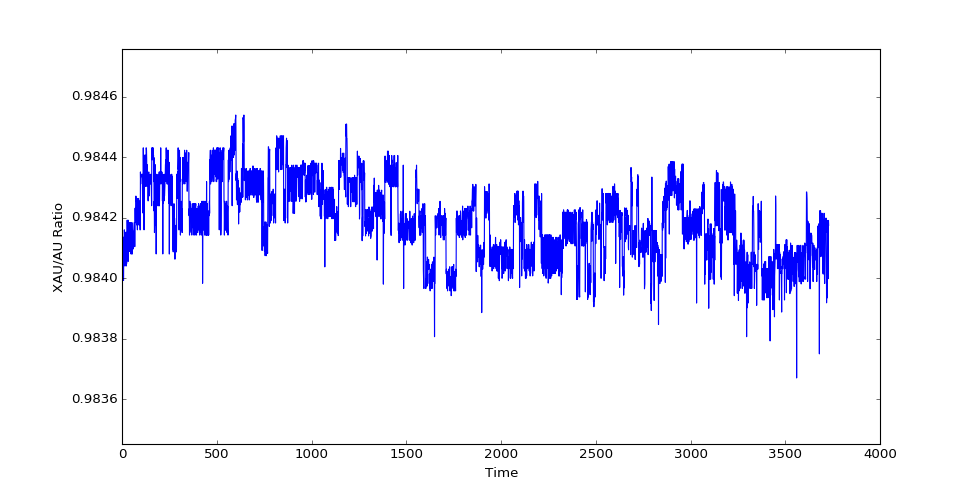

0.9775 0.9924999999999999


In [13]:
lr = LiveRatio()

In [14]:
lr.rcvData()

In [15]:
lr.stop()

In [34]:
res = w.wsq("XAUCNY.IDC,AU.SHF", "rt_time,rt_last,rt_pct_chg", func=updFig_1)

In [35]:
w.cancelRequest(res.RequestID)

In [10]:
cnt

0

In [39]:
ax.lines[0].set_xdata(x)
ax.lines[0].set_xdata(y)

In [40]:
fig.canvas.draw()

In [41]:
plt.show()

In [42]:
def pltsin(ax, colors=['b']):
    x = np.linspace(0,1,100)
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(x)
            y = np.random.random(size=(100,1))
            line.set_ydata(y)
    else:
        for color in colors:
            y = np.random.random(size=(100,1))
            ax.plot(x, y, color)
    fig.canvas.draw()

<IPython.core.display.Javascript object>


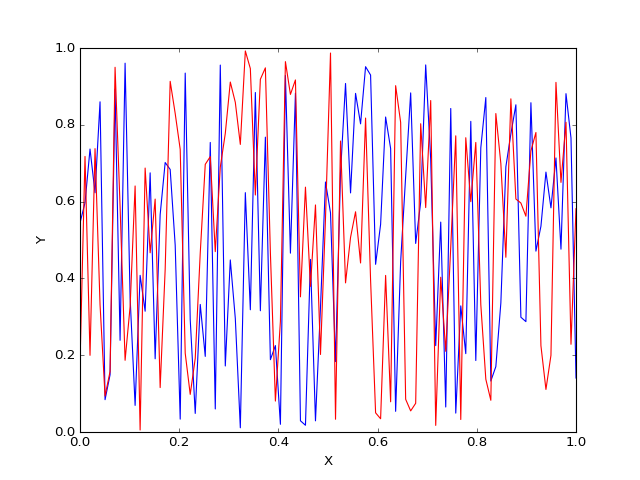

In [45]:
import time
fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for f in range(15):
    pltsin(ax, ['b', 'r'])
    time.sleep(1)

In [1]:
from wxpy import *

In [2]:
bot = Bot()

Traceback (most recent call last):
  File "d:\python35\lib\site-packages\requests\packages\urllib3\connection.py", line 138, in _new_conn
    (self.host, self.port), self.timeout, **extra_kw)
  File "d:\python35\lib\site-packages\requests\packages\urllib3\util\connection.py", line 98, in create_connection
    raise err
  File "d:\python35\lib\site-packages\requests\packages\urllib3\util\connection.py", line 88, in create_connection
    sock.connect(sa)
TimeoutError: [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\python35\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 594, in urlopen
    chunked=chunked)
  File "d:\python35\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 350, in _make_request
    self._validate_conn(conn)
  File "d:\python35\lib\site-packages\requests\packages\urllib3\connectionpool.py", line 835, in _valida

SystemExit: 

d:\python35\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import os

In [3]:
os.chdir("D:\\workspace\\Cpp\\BoostPythonTest\\x64\\Debug")

In [4]:
import hello

In [4]:
h = hello.World()

In [5]:
h.init()

In [6]:
h.callMyBack()

'This is the parent callback function'

In [5]:
class SubWorld(hello.World):
    def rcvd(self):
        return 'This is derived class callback'
    
    def rcvdu(self, x):
        print(x)


In [6]:
g = SubWorld()

In [7]:
g.init()

In [ ]:
g.userBack()

In [14]:
g.callMyBack()

'This is derived class callback'

In [5]:
c = hello.Cbk()

In [6]:
h.setCbk(c)

ArgumentError: Python argument types in
    World.setCbk(World, Cbk)
did not match C++ signature:
    setCbk(struct World {lvalue}, class CbkCls * __ptr64)

In [9]:
h.set('what the heckkkk...')

In [9]:
h.greet()

'what the...'

In [6]:
def myfunc(s):
    print('rcved "{}", new bee!'.format(s))

In [7]:
h.setPyCallback(myfunc)

In [10]:
h.callPyBack()

rcved "what the heckkkk...", new bee!


In [1]:
import os
os.chdir("D:\\workspace\\Python\\PyTrader\\vn.trader\\ctpGateway")

In [2]:
from vnctpmd import MdApi

In [3]:
class CtpMdApi(MdApi):
    """CTP行情API实现"""

    #----------------------------------------------------------------------
    def __init__(self):
        """Constructor"""
        super(CtpMdApi, self).__init__()
        
        self.reqID = -1              # 操作请求编号
        
        self.connectionStatus = False       # 连接状态
        self.loginStatus = False            # 登录状态
        
        self.subscribedSymbols = set()      # 已订阅合约代码        
        
        self.userID = 'XXX'          # 账号
        self.password = 'XXXX'        # 密码
        self.brokerID = '9999'        # 经纪商代码
        self.address = 'tcp://180.168.146.187:10010'         # 服务器地址
        
    #----------------------------------------------------------------------
    def onFrontConnected(self):
        """服务器连接"""
        self.connectionStatus = True
        
        print('行情服务器连接成功')
        self.login()
    
    #----------------------------------------------------------------------  
    def onFrontDisconnected(self, n):
        """服务器断开"""
        self.connectionStatus = False
        self.loginStatus = False
        
        print('行情服务器连接断开')     
        
    #---------------------------------------------------------------------- 
    def onHeartBeatWarning(self, n):
        """心跳报警"""
        # 因为API的心跳报警比较常被触发，且与API工作关系不大，因此选择忽略
        pass
    
    #----------------------------------------------------------------------   
    def onRspError(self, error, n, last):
        """错误回报"""
        errorID = error['ErrorID']
        errorMsg = error['ErrorMsg'].decode('gbk')
        print(errorID, errorMsg)
        
    #----------------------------------------------------------------------
    def onRspUserLogin(self, data, error, n, last):
        """登陆回报"""
        # 如果登录成功，推送日志信息
        if error['ErrorID'] == 0:
            self.loginStatus = True
            
            print('行情服务器登录完成')
            
            # 重新订阅之前订阅的合约
            for symbol in self.subscribedSymbols:
                self.subscribe(symbol)
                
        # 否则，推送错误信息
        else:
            errorID = error['ErrorID']
            errorMsg = error['ErrorMsg'].decode('gbk')
            print(errorID, errorMsg)

    #---------------------------------------------------------------------- 
    def onRspUserLogout(self, data, error, n, last):
        """登出回报"""
        # 如果登出成功，推送日志信息
        if error['ErrorID'] == 0:
            self.loginStatus = False
            self.gateway.mdConnected = False
            
            log = VtLogData()
            log.gatewayName = self.gatewayName
            log.logContent = '行情服务器登出完成'
            self.gateway.onLog(log)
                
        # 否则，推送错误信息
        else:
            err = VtErrorData()
            err.gatewayName = self.gatewayName
            err.errorID = error['ErrorID']
            err.errorMsg = error['ErrorMsg'].decode('gbk')
            self.gateway.onError(err)
        
    #----------------------------------------------------------------------  
    def onRspSubMarketData(self, data, error, n, last):
        """订阅合约回报"""
        # 通常不在乎订阅错误，选择忽略
        pass
        
    #----------------------------------------------------------------------  
    def onRspUnSubMarketData(self, data, error, n, last):
        """退订合约回报"""
        # 同上
        pass  
        
    #----------------------------------------------------------------------  
    def onRtnDepthMarketData(self, data):
        """行情推送"""
        print(data)
        
    #---------------------------------------------------------------------- 
    def onRspSubForQuoteRsp(self, data, error, n, last):
        """订阅期权询价"""
        pass
        
    #----------------------------------------------------------------------
    def onRspUnSubForQuoteRsp(self, data, error, n, last):
        """退订期权询价"""
        pass 
        
    #---------------------------------------------------------------------- 
    def onRtnForQuoteRsp(self, data):
        """期权询价推送"""
        pass        
        
    #----------------------------------------------------------------------
    def connect(self, userID = None, password = None, brokerID = None, address = None):
        """初始化连接"""
        if userID and password and brokerID:
            self.userID = userID                # 账号
            self.password = password            # 密码
            self.brokerID = brokerID            # 经纪商代码
            self.address = address              # 服务器地址
        
        # 如果尚未建立服务器连接，则进行连接
        if not self.connectionStatus:
            # 创建C++环境中的API对象，path 是用来保存.con文件的文件夹
            path = '../temp/'
            if not os.path.exists(path):
                os.makedirs(path)
            self.createFtdcMdApi(path)
            
            # 注册服务器地址
            self.registerFront(self.address)
            
            # 初始化连接，成功会调用onFrontConnected
            self.init()
            
        # 若已经连接但尚未登录，则进行登录
        else:
            if not self.loginStatus:
                self.login()
        
    #----------------------------------------------------------------------
    def subscribe(self, symbol):
        """订阅合约"""
        # 这里的设计是，如果尚未登录就调用了订阅方法
        # 则先保存订阅请求，登录完成后会自动订阅
        if self.loginStatus:
            self.subscribeMarketData(symbol)
        self.subscribedSymbols.add(symbol)   
        
    #----------------------------------------------------------------------
    def login(self):
        """登录"""
        # 如果填入了用户名密码等，则登录
        if self.userID and self.password and self.brokerID:
            req = {}
            req['UserID'] = self.userID
            req['Password'] = self.password
            req['BrokerID'] = self.brokerID
            self.reqID += 1
            self.reqUserLogin(req, self.reqID)
    
    #----------------------------------------------------------------------
    def close(self):
        """关闭"""
        self.exit()



In [4]:
c = CtpMdApi()

In [5]:
c.connect()

行情服务器连接成功
行情服务器登录完成


In [6]:
c.subscribe("CF705")

{'OpenPrice': 15295.0, 'AskVolume5': 0, 'AskVolume1': 8, 'BidPrice5': 1.7976931348623157e+308, 'ExchangeInstID': '', 'AskVolume3': 0, 'AveragePrice': 15210.0, 'PreSettlementPrice': 15250.0, 'AskPrice5': 1.7976931348623157e+308, 'UpdateMillisec': 0, 'AskPrice3': 1.7976931348623157e+308, 'CurrDelta': 1.7976931348623157e+308, 'Volume': 75590, 'BidPrice2': 1.7976931348623157e+308, 'BidVolume3': 0, 'AskVolume4': 0, 'OpenInterest': 217204.0, 'UpdateTime': '09:05:59', 'AskPrice2': 1.7976931348623157e+308, 'BidPrice1': 15100.0, 'AskPrice1': 15105.0, 'SettlementPrice': 15225.0, 'PreOpenInterest': 218824.0, 'BidPrice3': 1.7976931348623157e+308, 'BidVolume5': 0, 'BidPrice4': 1.7976931348623157e+308, 'LowestPrice': 15020.0, 'BidVolume4': 0, 'UpperLimitPrice': 16015.0, 'ActionDay': '20170327', 'LastPrice': 15100.0, 'TradingDay': '20170327', 'InstrumentID': 'CF705', 'Turnover': 1149723900.0, 'ExchangeID': '', 'PreClosePrice': 15270.0, 'BidVolume2': 0, 'HighestPrice': 15365.0, 'ClosePrice': 15085.0, 

In [7]:
c.close()

In [1]:
import os
#os.chdir("D:\\Study\\financial")
os.chdir("C:\\workspace\\python\\PriceCompare\\temp\\2017s01\\pdf")

In [2]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine, LTRect, LTChar

In [11]:
# Open a PDF file.
fp = open('160420.pdf', 'rb')

# Create a PDF parser object associated with the file object.
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
fp.close()

rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)


In [20]:
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
            print(lt_obj.get_text())

长盛同智优势成长混合型证券投资基金（LOF）
2016 年年度报告 

2016 年 12 月 31 日 

基金管理人：长盛基金管理有限公司 

基金托管人：中国银行股份有限公司 

送出日期：2017 年 3 月 27 日 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

长盛同智优势混合（LOF）2016 年年度报告 

§1 重要提示及目录 

1.1 重要提示 

基金管理人的董事会、董事保证本报告所载资料不存在虚假记载、误导性陈述或重大遗漏，

并对其内容的真实性、准确性和完整性承担个别及连带的法律责任。本年度报告已经三分之二以

上独立董事签字同意，并由董事长签发。 

基金托管人中国银行股份有限公司根据本基金合同规定，于 2017 年 3 月 24 日复核了本报告

中的财务指标、净值表现、利润分配情况、财务会计报告、投资组合报告等内容，保证复核内容

不存在虚假记载、误导性陈述或者重大遗漏。 

基金管理人承诺以诚实信用、勤勉尽责的原则管理和运用基金资产，但不保证基金一定盈利。 

基金的过往业绩并不代表其未来表现。投资有风险，投资者在作出投资决策前应仔细阅读本

基金的招募说明书及其更新。 

本年度报告财务资料已经审计，安永华明会计师事务所（特殊普通合伙）为本基金出具了无

保留意见的审计报告。 

本报告期自 2016 年 01 月 01 日起至 12 月 31 日止。 

第 2 页 共 64 页 

  

长盛同智优势混合（LOF）2016 年年度报告 

1.2 目录 

§1 重要提示及目录 ................................................................................................................................... 2 
1.1 重要提示 ...................................................................................................................................... 2 
1.2 目录 ............


金额单位：人民币元 
2014 年 

-255,755,774.94 

915,076,930.80 

369,311,193.90 

本期利润 

-252,290,740.13 

450,175,324.89 

739,202,690.21 

加权平均基金份额本期利润 

本期加权平均净值利润率 

本期基金份额净值增长率 
3.1.2 期末数据和指标 
期末可供分配利润 

-0.2744 

-31.77% 

-23.65% 

0.3399 

26.64% 

12.74% 

0.3773 

44.01% 

46.35% 

2016 年末 

2015 年末 

2014 年末 

-153,525,343.54 

202,296,632.53 

404,585,802.64 

期末可供分配基金份额利润 

-0.1724 

0.2288 

0.1806 

期末基金资产净值 

736,823,829.95 

1,086,480,504.06 

2,644,537,581.82 

期末基金份额净值 
3.1.3 累计期末指标 
基金份额累计净值增长率 

0.8276 

1.2288 

1.1806 

2016 年末  

2015 年末  

2014 年末  

84.93% 

142.23% 

114.86% 

注：1、所述基金业绩指标不包括持有人认购或交易基金的各项费用，计入费用后实际收益水平要

低于所列数字。 

2、本期已实现收益指基金本期利息收入、投资收益、其他收入（不含公允价值变动收益）扣除相

关费用后的余额，本期利润为本期已实现收益加上本期公允价值变动收益。 

3、期末可供分配利润，采用期末资产负债表中未分配利润与未分配利润中已实现部分的孰低数。

表中的“期末”均指本报告期最后一日，即 12 月 31 日。 

4、本基金由同智证券投资基金转型而来，转型日为 2007 年 1 月 5 日。 

第 6 页 共 64 页 

  

长盛同智优势混合（LOF）2016 年年度报告 

3.2 基金净值表现 

3.2.1 基金份额净值增长率及其与同期业绩比较基准收益率的比较 

阶段 

份额净值
增长率① 

份额净值
增长率标
准差② 

业绩比较
基准收益
率③ 

业

548,399,329.52 

624,527,202.58 

基金投资 

- 

- 

债券投资 

- 

- 

资产支持证券投资  

- 

- 

贵金属投资 

- 

- 

衍生金融资产 

7.4.7.3 

- 

- 

买入返售金融资产 

7.4.7.4 

- 

- 

应收证券清算款 

- 

- 

应收利息 

7.4.7.5 

42,448.40 

104,371.59 

应收股利 

- 

- 

应收申购款 
递延所得税资产 
其他资产 

103,679.39 

9,000.96 

- 

- 

7.4.7.6 

- 

- 

资产总计 

756,355,721.52 

1,109,659,434.35 

负债和所有者权益 

附注号 

本期末 
2016 年 12 月 31 日 

上年度末 
2015 年 12 月 31 日 

负 债： 

短期借款 

- 

- 

交易性金融负债 

- 

- 

衍生金融负债 

7.4.7.3 

- 

- 

卖出回购金融资产款 

- 

- 

应付证券清算款 

14,701,380.81 

11,529,664.97 

应付赎回款 

350,824.15 

1,852,029.23 

应付管理人报酬 

945,731.74 

1,421,375.75 

应付托管费 

157,621.96 

236,895.94 

应付销售服务费 

- 

- 

应付交易费用 

7.4.7.7 

1,736,170.28 

6,477,997.46 

应交税费 

305,932.19 

305,932.19 

应付利息 

- 

- 

应付利润 
递延所得税负债 
其他负债 

428,798.09 

428,798.09 

- 

- 

7.4.7.8 

905,432.35 

926,236.66 

负债合计 

19,531,891.57 

23,178,930.29 

所有者权益： 

实收基金 

7.4.7.9 

890,349,173.49 

884,183,871.53 

未分配利润 

7.4.7.10 

-153,525,343.54 

202,296

合计 

7.4.7.9 实收基金 

项目 

上年度末 

本期申购 

本期赎回（以“-”号填列） 

本期末 

500,000.00 

169.81 

145,262.54 

80,000.00 

180,000.00 

905,432.35 

500,000.00 

974.12 

145,262.54 

100,000.00 

180,000.00 

926,236.66 

金额单位：人民币元 

本期 
2016 年 1 月 1 日至 2016 年 12 月 31 日 

基金份额（份） 

账面金额 

884,183,871.53 

75,318,565.87 

-69,153,263.91 

890,349,173.49 

884,183,871.53 

75,318,565.87 

-69,153,263.91 

890,349,173.49 

注：申购含转换入份额及金额，赎回含转换出份额及金额。 

7.4.7.10 未分配利润 

项目 

已实现部分 

未实现部分 

单位：人民币元 
未分配利润合计 

上年度末 

本期利润 

本期基金份额交易
产生的变动数 

603,436,513.20 

-401,139,880.67 

202,296,632.53 

-255,755,774.94 

3,465,034.81 

-252,290,740.13 

5,813,309.04 

-3,343,110.18 

2,470,198.86 

其中：基金申购款 

27,835,774.79 

-34,923,856.08 

基金赎回款 

-22,022,465.75 

31,580,745.90 

-7,088,081.29 

9,558,280.15 

本期已分配利润 

-106,001,434.80 

- 

-106,001,434.80 

本期末 

247,492,612.50 

-401,017,956.04 

-153,525,343.54 

第 30 页 共 64 页 

  

 

 

长盛同智优势混合（LOF）2016 年年度报告 

7.4.7.11 存款利息收入 

项目 

本期 
2016 年 1 月 1 日至 201


本基金本报告期及上年度可比期间无其他关联交易事项。 

7.4.11 利润分配情况 

金额单位：人民币元 

序号 
权益 
登记日 

除息日 

每 10 份 
基金份额分红
数 

现金形式 
发放总额 

再投资形式 
发放总额 

本期利润分配 
合计 

备注 

场内 场外 

1 2016 年 1

月 18 日 

2016 年 1 月

19 日 

2016 年 1

月 18 日 

1.2000 58,902,810.17 47,098,624.63 106,001,434.80 

 - 

合计 

- 

- 

1.2000 58,902,810.17 47,098,624.63 106,001,434.80 

-  

7.4.12 期末（ 2016 年 12 月 31 日 ）本基金持有的流通受限证券 

7.4.12.1 因认购新发/增发证券而于期末持有的流通受限证券 

金额单位：人民币元 

7.4.12.1.1 受限证券类别：股票 

证券 
代码 

证券 
名称 

成功 
认购日 

可流通
日 

流通受
认购 
期末估
限类型 
价格 
值单价 

数量 
（单位：股） 

期末 
成本总额 

期末估值
总额 

备注 

601375 

中原

证券 

2016 年 12

月 20 日 

2017 年 1

月 3 日 

新股流通

受限 

4.00 

4.00 

26,695 106,780.00 106,780.00 

- 

603228 

景旺

电子 

2016 年 12

月 28 日 

2017 年 1

月 6 日 

新股流通

受限 

23.16 

23.16 

3,117 

72,189.72 72,189.72 

- 

603877 

太平

鸟 

2016 年 12

月 29 日 

2017 年 1

月 9 日 

新股流通

受限 

21.30 

21.30 

3,180 

67,734.00 67,734.00 

- 

300583 

赛托

生物 

2016 年 12

月 29 日 

2017 年 1

月 6 日 

新股流通

受限 

40.29 

40.29 

1,582 

63,738.78

长盛同智优势混合（LOF）2016 年年度报告 

第 39 页 共 64 页 

资产总计 

207,810,264.21 

- 

- 

- 

- 548,545,457.31 756,355,721.52 

负债 

应付证券清算款 

- 

- 

- 

- 

- 14,701,380.81 

14,701,380.81 

应付赎回款 

- 

- 

- 

- 

- 

350,824.15 

350,824.15 

应付管理人报酬 

- 

- 

- 

- 

- 

945,731.74 

945,731.74 

应付托管费 

- 

- 

- 

- 

- 

157,621.96 

157,621.96 

应付交易费用 

- 

- 

- 

- 

- 1,736,170.28 

1,736,170.28 

应付利润 

- 

- 

- 

- 

- 

428,798.09 

428,798.09 

应交税费 

- 

- 

- 

- 

- 

305,932.19 

305,932.19 

其他负债 

- 

- 

- 

- 

- 

905,432.35 

905,432.35 

负债总计 

- 

- 

- 

- 

- 19,531,891.57 

19,531,891.57 

利率敏感度缺口 207,810,264.21 

- 

- 

- 

- 529,013,565.74 736,823,829.95 

上年度末 
2015 年 12 月 31 日 

1 个月以内 

1-3 个
月 

3 个月
-1 年 

1-5 年 5 年以上 不计息 

合计 

资产 

银行存款 

471,787,736.30 

- 

- 

- 

- 

- 471,787,736.30 

结算备付金 

12,156,930.23 

- 

- 

- 

- 

- 

12,156,930.23 

存出保证金 

1,074,192.69 

- 

- 

- 

- 

- 

1,074,192.69 

交易性金融资产 

- 

- 

- 

- 

- 624,527,202.58 624,527,202

占基金资产净
值比例（%） 

交易性金融资产-股票投资 

548,399,329.52 

74.43 624,527,202.58 

57.48 

交易性金融资产－基金投资 

交易性金融资产－债券投资 

交易性金融资产－贵金属投资 

衍生金融资产－权证投资 

其他 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

- 

合计 

548,399,329.52 

74.43 624,527,202.58 

57.48 

7.4.13.4.3.2 其他价格风险的敏感性分析 

假设 

分析 

假定本基金的业绩比较基准变化 5%，其他变量不变； 

用期末时点比较基准浮动 5%基金资产净值相应变化来估测组合市场价格风险； 

Beta 系数是根据组合在过去一个年度的基金资产净值和基准指数数据回归得出，
反映了基金和基准的相关性。 

相关风险变量的变动 

对资产负债表日基金资产净值的 
影响金额（单位：人民币元） 

本期末（ 2016 年 12 月
31 日 ） 

上年度末（ 2015 年 12 月
31 日 ） 

+5% 

39,498,582.76 

68,053,336.09 

第 40 页 共 64 页 

  

 

长盛同智优势混合（LOF）2016 年年度报告 

-5% 

-39,498,582.76 

-68,053,336.09 

注：本基金管理人运用定量分析方法对本基金的其他价格风险进行分析。上表为其他价格风险的

敏感性分析，反映了在其他变量不变的假设下，证券投资价格发生合理、可能的变动时，将对基

金资产净值产生的影响。 

7.4.14 有助于理解和分析会计报表需要说明的其他事项 

7.4.14.1 公允价值 

银行存款、结算备付金、应收证券清算款、应收申购款、应付赎回款等，因其剩余期限不长，

公允价值与账面价值相若。 

(1)各层次金融工具公允价值 

本基金本报告期末持有的以公允价值计量的金融工具中属于第一层次的余额为人民币

547,275,354.53 元，属于第二层次的余额为人民币 1,123,974.99 元，无属于第三层次的余额

（2015 年 12 月 31 日：

11,929,200 40,320,696.00 

5.47 

3 

600031 三一重工 

5,337,971 32,561,623.10 

4.42 

4 

000998 隆平高科 

1,492,061 31,974,867.23 

4.34 

5 

600737 中粮屯河 

1,844,300 22,979,978.00 

3.12 

6 

600873 梅花生物 

3,410,100 22,233,852.00 

3.02 

7 

000930 中粮生化 

1,367,000 18,372,480.00 

2.49 

8 

002353 杰瑞股份 

857,387 17,404,956.10 

2.36 

9 

000860 顺鑫农业 

705,000 15,510,000.00 

2.10 

10 

600057 象屿股份 

1,301,100 14,962,650.00 

2.03 

11 

600108 亚盛集团 

2,595,600 14,846,832.00 

2.01 

12 

603718 海利生物 

818,260 14,581,393.20 

1.98 

13 

002470 金正大 

1,728,508 13,655,213.20 

1.85 

14 

600811 东方集团 

1,841,200 13,164,580.00 

1.79 

15 

000902 新洋丰 

1,039,584 11,705,715.84 

1.59 

16 

002304 洋河股份 

163,026 11,509,635.60 

1.56 

17 

601390 中国中铁 

1,265,000 11,207,900.00 

1.52 

18 

000049 德赛电池 

248,260 10,439,333.00 

1.42 

19 

600186 莲花健康 

1,930,566 9,923,109.24 

1.35 

20 

002658 雪迪龙 

565,100 9,719,720.00 

1.32 

21 

002573 清新环境 

546,700 9,550,849.00 

1.30 

22 




506,345 5,741,952.30 

0.78 

35 

000600 建投能源 

573,900 5,096,232.00 

0.69 

36 

600960 渤海活塞 

542,942 4,810,466.12 

0.65 

37 

603766 隆鑫通用 

200,000 4,156,000.00 

0.56 

38 

600583 海油工程 

517,200 3,816,936.00 

0.52 

39 

600856 中天能源 

274,200 3,783,960.00 

0.51 

40 

600292 远达环保 

288,000 3,562,560.00 

0.48 

41 

000669 金鸿能源 

202,700 3,476,305.00 

0.47 

42 

002454 松芝股份 

247,900 3,378,877.00 

0.46 

43 

603456 九洲药业 

149,875 3,232,803.75 

0.44 

44 

601186 中国铁建 

184,100 2,201,836.00 

0.30 

45 

601607 上海医药 

111,355 2,178,103.80 

0.30 

46 

000616 海航投资 

390,700 2,039,454.00 

0.28 

47 

002273 水晶光电 

98,450 1,959,155.00 

0.27 

48 

002743 富煌钢构 

99,909 1,566,573.12 

0.21 

49 

600729 重庆百货 

60,000 1,405,800.00 

0.19 

50 

300021 大禹节水 

56,423 1,026,898.60 

0.14 

51 

601229 上海银行 

43,439 1,011,259.92 

0.14 

52 

300442 普丽盛 

20,800 

896,896.00 

0.12 

53 

600909 华安证券 

39,964 

501,548.20 

0.07 

54 

300323 华灿光电 

50,000 

439,500.00 

0.06 

长盛同智优势混合（LOF）2016 年年度报告 

第 46 页 共 64 页 

108 

603559 中通国脉 

899 

48,447.11 

0.01 

109 

002833 弘亚数控 

2,743 

48,331.66 

0.01 

110 

603389 亚振家居 

1,963 

47,327.93 

0.01 

111 



002816 和科达 

1,000 

47,280.00 

0.01 

112 

603058 永吉股份 

3,869 

42,675.07 

0.01 

113 

603319 湘油泵 

721 

40,736.50 

0.01 

114 

002828 贝肯能源 

1,037 

40,028.20 

0.01 

115 

603886 元祖股份 

2,241 

39,665.70 

0.01 

116 

300582 英飞特 

1,359 

35,157.33 

0.00 

117 

603239 浙江仙通 

924 

29,059.80 

0.00 

118 

002835 同为股份 

1,126 

24,220.26 

0.00 

119 

603035 常熟汽饰 

2,316 

24,179.04 

0.00 

120 

603266 天龙股份 

1,562 

22,852.06 

0.00 

121 

300587 天铁股份 

1,438 

20,290.18 

0.00 

122 

603929 亚翔集成 

2,193 

15,592.23 

0.00 

123 

002840 华统股份 

1,814 

11,881.70 

0.00 

124 

002838 道恩股份 

681 

10,405.68 

0.00 

125 

603186 华正新材 

1,874 

10,063.38 

0.00 

126 

603032 德新交运 

1,628 

9,458.68 

0.00 

127 

300586 美联新材 

1,006 

9,355.80 

0.00 

128 

300591 万里马 

2,397 

7,358.79 

0.00 

129 

300588 熙菱信息 

1,380 

6,817.20 

0.00 

8.4 报告期内股票投资组合的重大变动 

8.4.1  累计买入金额超出期初基金资产净值 2%或前 20 名的股票明细 

金额单位：人民币元 

序号 股票代码 

股票名称 

本期累计买入金额 

占期初基金资产净值
比例（%） 

1 

30


31,878,766.00 

2.93 

42 

600485 

信威集团 

31,743,352.75 

2.92 

43 

002074 

国轩高科 

31,223,421.74 

2.87 

44 

600031 

三一重工 

31,192,258.93 

2.87 

45 

300274 

阳光电源 

30,708,348.46 

2.83 

46 

000998 

隆平高科 

29,588,516.70 

2.72 

  

长盛同智优势混合（LOF）2016 年年度报告 

第 48 页 共 64 页 

47 

000971 

高升控股 

29,504,330.24 

2.72 

48 

002354 

天神娱乐 

29,490,362.50 

2.71 

49 

000881 

大连国际 

29,434,957.23 

2.71 

50 

601118 

海南橡胶 

29,128,358.83 

2.68 

51 

000983 

西山煤电 

28,681,211.84 

2.64 

52 

002739 

万达院线 

28,644,135.44 

2.64 

53 

000959 

首钢股份 

28,215,672.23 

2.60 

54 

600395 

盘江股份 

27,927,682.54 

2.57 

55 

300196 

长海股份 

27,731,312.62 

2.55 

56 

300479 

神思电子 

27,726,055.70 

2.55 

57 

002268 

卫 士 通 

25,878,183.01 

2.38 

58 

300202 

聚龙股份 

25,609,173.00 

2.36 

59 

002183 

怡 亚 通 

25,471,511.45 

2.34 

60 

002124 

天邦股份 

25,358,031.86 

2.33 

61 

002714 

牧原股份 

25,326,490.41 

2.33 

62 

002567 

唐人神 

25,194,629.52 

2.32 

63 




24,741,560.58 

2.28 

73 

600990 

四创电子 

24,729,379.87 

2.28 

74 

000070 

特发信息 

24,620,699.05 

2.27 

75 

600782 

新钢股份 

24,607,707.64 

2.26 

76 

000733 

振华科技 

24,586,911.10 

2.26 

77 

600547 

山东黄金 

24,520,773.27 

2.26 

78 

002727 

一心堂 

24,451,265.98 

2.25 

79 

002049 

紫光国芯 

24,443,197.90 

2.25 

80 

002429 

兆驰股份 

24,264,018.16 

2.23 

81 

002501 

利源精制 

24,256,140.62 

2.23 

82 

000938 

紫光股份 

24,197,771.33 

2.23 

  

长盛同智优势混合（LOF）2016 年年度报告 

第 49 页 共 64 页 

83 

600584 

长电科技 

24,113,643.12 

2.22 

84 

002020 

京新药业 

24,081,448.86 

2.22 

85 

000726 

鲁  泰Ａ 

24,078,114.51 

2.22 

86 

002250 

联化科技 

24,067,746.50 

2.22 

87 

600587 

新华医疗 

24,054,869.03 

2.21 

88 

002065 

东华软件 

24,038,971.35 

2.21 

89 

600332 

白云山 

24,025,858.13 

2.21 

90 

600399 

抚顺特钢 

23,924,317.88 

2.20 

91 

002353 

杰瑞股份 

23,758,944.14 

2.19 

92 

300253 

卫宁健康 

23,499,708.28 

2.16 

93 

600036 

招商银行 

23,498,518.81 

2.16 

94 

60

106 

002223 

鱼跃医疗 

22,376,516.40 

2.06 

107 

002032 

苏 泊 尔 

21,813,561.66 

2.01 

8.4.2 累计卖出金额超出期初基金资产净值 2%或前 20 名的股票明细 

金额单位：人民币元 

序号 股票代码 

股票名称 

本期累计卖出金额 

占期初基金资产净值
比例（%） 

1 

300133 

华策影视 

76,337,753.63 

7.03 

2 

002030 

达安基因 

71,368,197.55 

6.57 

3 

600518 

康美药业 

66,627,994.70 

6.13 

4 

002701 

奥瑞金 

65,076,497.98 

5.99 

5 

300101 

振芯科技 

62,490,638.02 

5.75 

6 

601233 

桐昆股份 

58,400,908.62 

5.38 

7 

300369 

绿盟科技 

58,190,805.31 

5.36 

  

长盛同智优势混合（LOF）2016 年年度报告 

第 50 页 共 64 页 

8 

002475 

立讯精密 

56,295,348.65 

5.18 

9 

000738 

中航动控 

53,216,165.03 

4.90 

10 

000687 

华讯方舟 

52,719,096.49 

4.85 

11 

600804 

鹏博士 



51,341,498.49 

4.73 

12 

600037 

歌华有线 

51,131,903.86 

4.71 

13 

600372 

中航电子 

51,068,384.92 

4.70 

14 

002285 

世联行 

50,693,403.93 

4.67 

15 

600038 

中直股份 

50,234,516.25 

4.62 

16 

603019 

中科曙光 

49,814,802.38 

4.58 

17 

601336 

新华保险 

49,123,947.95 

4.52 

18 

002179 

中航光电 

48,828,871.17 

4.49 

19 

002007 

华兰生物 

46,557,869.41 

4.29 

20 

600563 

法拉电子 

43,705,827.12 

4.02 

21 

000567 

海德股份 

43,674,307.87 

4.02 

22 

000703 

恒逸石化 

43,560,285.50 

4.01 

23 

000768 

中航飞机 

43,260,544.58 

3.98 

24 

600487 

亨通光电 

42,680,751.07 

3.93 

25 

300024 

机器人 

42,094,292.15 

3.87 

26 

002025 

航天电器 

41,489,394.52 

3.82 

27 

002465 

海格通信 

40,262,619.89 

3.71 

28 

300136 

信维通信 

39,078,480.84 

3.60 

29 

002004 

华邦健康 

39,077,371.85 

3.60 

30 

600028 

中国石化 

38,571,723.10 

3.55 

31 

000558 

莱茵体育 

37,558,791.43 

3.46 

32 

002367 

康力电梯 

36,756,018.21 

3.38 

33 

002594 

比亚迪 

36,453,365.37 

3.36 

34 

002085


50 

600395 

盘江股份 

28,308,880.14 

2.61 

51 

000881 

大连国际 

28,219,002.72 

2.60 

52 

300302 

同有科技 

28,209,477.92 

2.60 

53 

000983 

西山煤电 

27,906,457.85 

2.57 

54 

002508 

老板电器 

27,689,282.97 

2.55 

55 

300479 

神思电子 

27,279,775.98 

2.51 

56 

000971 

高升控股 

27,203,289.36 

2.50 

57 

002354 

天神娱乐 

27,115,364.00 

2.50 

58 

002124 

天邦股份 

26,937,907.89 

2.48 

59 

300196 

长海股份 

26,653,158.02 

2.45 

60 

002739 

万达院线 

26,648,397.54 

2.45 

61 

600485 

信威集团 

26,538,756.85 

2.44 

62 

002414 

高德红外 

26,301,787.71 

2.42 

63 

002470 

金正大 

26,252,894.58 

2.42 

64 

600547 

山东黄金 

25,305,190.98 

2.33 

65 

600587 

新华医疗 

25,183,263.51 

2.32 

66 

000423 

东阿阿胶 

25,105,483.47 

2.31 

67 

002597 

金禾实业 

24,941,245.36 

2.30 

68 

601012 

隆基股份 

24,716,194.68 

2.27 

69 

000938 

紫光股份 

24,583,615.12 

2.26 

70 

300010 

立思辰 

24,429,180.11 

2.25 

71 

300485 

赛升药业 

24,354,521.10 

2.24 

72 

000726 

鲁  泰Ａ 

24,300,019.

佣金 

占当期佣金 
总量的比例 

东兴证券 

1 

8,207,389,901.48 

64.13% 

7,643,556.32 

64.49% 

- 

东北证券 

1 

1,990,792,322.61 

15.56% 

1,854,015.30 

15.64% 

- 

中信建投 

2 

805,014,241.00 

6.29% 

749,707.41 

6.33% 

- 

申银万国 

2 

643,475,656.10 

5.03% 

599,270.96 

5.06% 

- 

长江证券 

1 

491,123,790.46 

3.84% 

457,383.38 

3.86% 

- 

安信证券 

2 

332,937,354.69 

2.60% 

243,476.27 

2.05% 

- 

国泰君安 

1 

203,747,078.58 

1.59% 

189,750.38 

1.60% 

- 

华安证券 

1 

107,783,796.69 

0.84% 

100,378.59 

0.85% 

- 

国信证券 

1 

15,204,640.00 

0.12% 

14,159.95 

0.12% 

- 

国联证券 

1 

- 

- 

- 

- 

- 

长城证券 

1 

- 

- 

- 

- 

- 

东吴证券 

1 

- 

- 

- 

- 

- 

高华证券 

1 

- 

- 

- 

- 

- 

西南证券 

1 

- 

- 

- 

- 

- 

国元证券 

1 

- 

- 

- 

- 

- 

上海证券 

1 

- 

- 

- 

- 

- 

广发证券 

1 

- 

- 

- 

- 

- 

中金公司 

1 

- 

- 

- 

- 

- 

日信证券 

1 

- 

- 

- 

- 

- 

中信证券 

2 

- 

- 

- 

- 

- 

五矿证券 

1 

- 

- 

- 

- 

- 

  

长盛同智优势混合（LOF）2016 年年度报告 

第 57 页 共 64 页 

东海证

In [111]:
def test_overlap(left1, right1, left2, right2):
    if (left2 >= left1 and left2 < right1) or (right2 > left1 and right2 <= right1):
        return True
    return False
#end def

def group_by_line(lsTextBox):
    dGrp = {}
    iGrp = 0
    for lt_txtbox in lsTextBox:
        x0, y0, x1, y1 = lt_txtbox.bbox
        bFound = False
        for iKey, dVal in dGrp.items():
            tRng = dVal['range']
            if test_overlap(tRng[0], tRng[1], y0, y1):
                dVal['list'].append(lt_txtbox)
                dVal['range'] = (min(tRng[0], y0), max(tRng[1], y1))
                bFound = True
                break
        #end for
        if not bFound:
            dVal = {}
            dVal['range'] = (y0, y1)
            dVal['list'] = [lt_txtbox]
            iGrp += 1
            dGrp[iGrp] = dVal
    #end for
    #print("We got {} groups".format(len(dGrp)))
    
    for dVal in dGrp.values():
        dVal['list'] = sorted(dVal['list'], key = lambda bx: bx.x0)
    
    lsLines = sorted(dGrp.values(), key = lambda d: d['range'][0], reverse=True)
    
    for dVal in lsLines:
        print('\t'.join([bx.get_text().strip().replace('\n', '') for bx in dVal['list']]))
            

In [112]:
i = 0
for page in doc.get_pages():
    i += 1     # page num
    interpreter.process_page(page)
    layout = device.get_result()
    lsTxtBox = []
    for lt_obj in layout:
        if isinstance(lt_obj, LTTextBox):
            i += 1
            lsTxtBox.append(lt_obj)
    group_by_line(lsTxtBox)
    print('')
#end for

长盛同智优势成长混合型证券投资基金（LOF）2016 年年度报告
2016 年 12 月 31 日
基金管理人：长盛基金管理有限公司
基金托管人：中国银行股份有限公司
送出日期：2017 年 3 月 27 日

长盛同智优势混合（LOF）2016 年年度报告
§1 重要提示及目录
1.1 重要提示
基金管理人的董事会、董事保证本报告所载资料不存在虚假记载、误导性陈述或重大遗漏，
并对其内容的真实性、准确性和完整性承担个别及连带的法律责任。本年度报告已经三分之二以
上独立董事签字同意，并由董事长签发。
基金托管人中国银行股份有限公司根据本基金合同规定，于 2017 年 3 月 24 日复核了本报告
中的财务指标、净值表现、利润分配情况、财务会计报告、投资组合报告等内容，保证复核内容
不存在虚假记载、误导性陈述或者重大遗漏。
基金管理人承诺以诚实信用、勤勉尽责的原则管理和运用基金资产，但不保证基金一定盈利。
基金的过往业绩并不代表其未来表现。投资有风险，投资者在作出投资决策前应仔细阅读本
基金的招募说明书及其更新。
本年度报告财务资料已经审计，安永华明会计师事务所（特殊普通合伙）为本基金出具了无
保留意见的审计报告。
本报告期自 2016 年 01 月 01 日起至 12 月 31 日止。
第 2 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
1.2 目录
§1 重要提示及目录 ................................................................................................................................... 2 1.1 重要提示 ...................................................................................................................................... 2 1.2 目录 .........................................................................................................

任职日期	离任日期
吴博文	本基金基金经理，长 盛 同 盛 成 长 优选 灵 活 配 置 混 合型 证 券 投 资 基 金（LOF）基金经理，长 盛 同 鑫 行 业 配置 混 合 型 证 券 投资基金基金经理，长 盛 国 企 改 革 主题 灵 活 配 置 混 合型 证 券 投 资 基 金基金经理。	2016 年 1 月6 日	-	9 年	吴博文先生，1983 年 6月出生。北京大学金融学硕士。历任雷曼兄弟证券股份有限公司分析师助理，野村证券股份有限公司分析师助理，诺安基金管理有限公司研究员、基金经理助理、基金经理。2015 年 8 月加入长盛基金管理有限公司。
田间	本基金基金经理，长 盛 国 企 改 革 主题 灵 活 配 置 混 合型 证 券 投 资 基 金基金经理。	2014 年 10 月14 日	2016 年 1 月6 日	7 年
田间女士，1978 年 11 月出生。中央财经大学经济学硕士。2008 年 7 月加入长盛基金管理有限公司，曾任行业研究员，基金经理助理、同盛证券投资基金基金经理等职务。
王宁	本基金基金经理，长 盛 城 镇 化 主 题混 合 型 证 券 投 资基金基金经理，长盛 基 金 管 理 有 限公司副总经理，权益投资部总监，社保组合组合经理。	2012 年 7 月20 日	2016 年 1 月6 日	18 年
王宁先生，1971 年 10 月出生。毕业于北京大学光华管理学院， EMBA。历任华夏基金管理有限公司基金经理助理，兴业 基 金 经 理 等 职 务 。2005 年 8 月加盟长盛基金管理有限公司，曾任基金经理助理、长盛动态精选证券投资基金基金经理，长盛同庆可分离交易股票型证券投资
第 10 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
基金基金经理，长盛成长价值证券投资基金基金经理，长盛同庆中证800 指数分级证券投资基金基金经理，公司总经理助理等职务。
代毅	-	6 年
本 基 金 基 金 经 理助 理 ， 行 业 研 究员。	2015 年 1 月8 日
男，1984 年 1 月出生，中国国籍。北京大学硕士。2010 年 7 月加入长盛基金管理有限公司。
注：1、上表基金经理及基金经理助理的任职日期和离任日期均指公司决定确定的聘任日期和解聘
日期；
2、“证券从业年限”中“证券从业”的含义遵从行业协会《证券业

长盛同智优势混合（LOF）2016 年年度报告
负债和所有者权益总计	756,355,721.52	1,109,659,434.35
注：报告截止日 2016 年 12 月 31 日，长盛同智优势成长混合型证券投资基金份额净值为人民币
0.8276 元，基金份额总额为 890,349,173.49 份。
7.2 利润表
会计主体：长盛同智优势成长混合型证券投资基金（LOF）
本报告期： 2016 年 1 月 1 日至 2016 年 12 月 31 日
单位：人民币元
项 目	附注号
本期 2016 年 1 月 1 日至2016 年 12 月 31 日	上年度可比期间 2015 年 1 月 1 日至2015 年 12 月 31 日
一、收入	-218,602,191.48	515,092,824.27
1.利息收入	2,503,271.16	3,339,700.38
其中：存款利息收入	7.4.7.11	2,503,271.16	3,339,700.38
债券利息收入	-	-
资产支持证券利息收入	-	-
买入返售金融资产收入	-	-
其他利息收入	-	-
2.投资收益（损失以“-”填列）	-224,590,079.27	974,734,351.06
其中：股票投资收益	7.4.7.12	-227,839,734.98	965,458,897.83
基金投资收益	-	-
债券投资收益	7.4.7.13	-	-
资产支持证券投资收益	-	-
贵金属投资收益	-	-
衍生工具收益	7.4.7.14	-	-
股利收益	7.4.7.15	3,249,655.71	9,275,453.23
3.公允价值变动收益（损失以“-”号填列） 4.汇兑收益（损失以“-”号填列） 5.其他收入（损失以“-”号填列） 7.4.7.17 减：二、费用	7.4.7.16	33,688,548.65	3,465,034.81	19,581.82	-	-464,901,605.91	64,917,499.38	1,920,378.74	-
1．管理人报酬	7.4.10.2.1	11,935,605.45	25,476,911.87
2．托管费	7.4.10.2.2	1,989,267.64	4,246,152.02
3．销售服务费	-	-
4．交易费用	7.4.7.18	19,314,938.32	

国元证券股份有限公司（“国元证券”） 基金管理人股东、基金代销机构
新加坡星展银行有限公司	基金管理人股东
安徽省信用担保集团有限公司	基金管理人股东
安徽省投资集团控股有限公司	基金管理人股东
长盛创富资产管理有限公司	基金管理人子公司
长盛基金（香港）有限公司	基金管理人子公司
注：以下关联交易均在正常业务范围内按一般商业条款订立。
7.4.10 本报告期及上年度可比期间的关联方交易
7.4.10.1 通过关联方交易单元进行的交易
注：本基金于本报告期及上年度可比期间均未通过关联方交易单元进行交易。
7.4.10.2 关联方报酬
7.4.10.2.1 基金管理费
单位：人民币元
项目
本期 2016 年 1 月 1 日至 2016 年 12月 31 日	上年度可比期间 2015 年 1 月 1 日至 2015 年 12 月 31日
当期发生的基金应支付的管理费	11,935,605.45	25,476,911.87
其中：支付销售机构的客户维护费	3,952,614.12	7,676,811.34
注：基金管理人的管理费每日计提，按月支付，由基金托管人复核后于次月首日起 10 个工作日内
从基金资产中一次性支付给基金管理人。基金管理费按前一日的基金资产净值的 1.50%的年费率
计提。计算方法如下：
H=E×1.50%/当年天数
H 为每日应计提的基金管理费
E 为前一日的基金资产净值
第 33 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
7.4.10.2.2 基金托管费
单位：人民币元
项目
本期 2016 年 1 月 1 日至 2016 年 12月 31 日	上年度可比期间 2015 年 1 月 1 日至 2015 年 12 月 31日
当期发生的基金应支付的托管费	1,989,267.64	4,246,152.02
注：基金托管费每日计提，按月支付，由基金托管人复核后于次月首日起 10 个工作日内从基金资
产中一次性支付给基金托管人。基金托管费按前一日的基金资产净值的 0.25%的年费率计提。计
算方法如下：
H=E×0.25%/当年天数
H 为每日应计提的基金托管费
E 为前一日的基金资产净值
7.4.10.3 与关联方进行银行间同业市场的债券(含回购)交易
注：本基金于本报告期及上年度可比期间均未与关联方进行银行间同业市场的债券

长盛同智优势混合（LOF）2016 年年度报告
300587	天铁	股份	2016 年 12	月 28 日	2017 年 1	月 5 日	新股流通	受限	14.11	14.11	1,438	20,290.18 20,290.18	-
002840	华统	股份	2016 年 12	月 29 日	2017 年 1	月 10 日	新股流通	受限	6.55	6.55	1,814	11,881.70 11,881.70	-
002838	道恩	股份	2016 年 12	月 28 日	2017 年 1	月 6 日	新股流通	受限	15.28	15.28	681	10,405.68 10,405.68	-
603186	华正	新材	2016 年 12	月 26 日	2017 年 1	月 3 日	新股流通	受限	5.37	5.37	1,874	10,063.38 10,063.38	-
603032	德新	交运	2016 年 12	月 27 日	2017 年 1	月 5 日	新股流通	受限	5.81	5.81	1,628	9,458.68 9,458.68	-
300586	美联	新材	2016 年 12	月 26 日	2017 年 1	月 4 日	新股流通	受限	9.30	9.30	1,006	9,355.80 9,355.80	-
300591	万里	马	2016 年 12	月 30 日	2017 年 1	月 10 日	新股流通	受限	3.07	3.07	2,397	7,358.79 7,358.79	-
300588	熙菱	信息	2016 年 12	月 27 日	2017 年 1	月 5 日	新股流通	受限	4.94	4.94	1,380	6,817.20 6,817.20	-
7.4.12.2 期末持有的暂时停牌等流通受限股票
金额单位：人民币元
股票代码	股票停牌日期 名称	停牌原因	期末 估值单价	复牌日期	复牌 数量（股） 开盘单价	期末 成本总额	期末估值总额	备注
300323	华灿	光电	2016 年 4	月 18 日	重大事	项停牌	2017 年 18.79	月 9 日	8.65	50,000 452,753.00 439,500.00	-
603986	兆易	创新	2016 年 9	月 19 日	重大事	项停牌	2017 年 3168.94	月 13 日	1

长盛同智优势混合（LOF）2016 年年度报告
资产总计	207,810,264.21	-	-	-	- 548,545,457.31 756,355,721.52
负债
应付证券清算款	-	-	-	-	- 14,701,380.81	14,701,380.81
应付赎回款	-	-	-	-	-	350,824.15	350,824.15
应付管理人报酬	-	-	-	-	-	945,731.74	945,731.74
应付托管费	-	-	-	-	-	157,621.96	157,621.96
应付交易费用	-	-	-	-	- 1,736,170.28	1,736,170.28
应付利润	-	-	-	-	-	428,798.09	428,798.09
应交税费	-	-	-	-	-	305,932.19	305,932.19
其他负债	-	-	-	-	-	905,432.35	905,432.35
负债总计	-	-	-	-	- 19,531,891.57	19,531,891.57
利率敏感度缺口 207,810,264.21	-	-	-	- 529,013,565.74 736,823,829.95
上年度末 2015 年 12 月 31 日	1 个月以内	1-3 个月	3 个月-1 年	1-5 年 5 年以上 不计息	合计
资产
银行存款	471,787,736.30	-	-	-	-	- 471,787,736.30
结算备付金	12,156,930.23	-	-	-	-	-	12,156,930.23
存出保证金	1,074,192.69	-	-	-	-	-	1,074,192.69
交易性金融资产	-	-	-	-	- 624,527,202.58 624,527,202.58
应收利息	-	-	-	-	-	104,371.59	104,371.59
应收申购款	-	-	-	-	-	9,000.96	9,000.96
其他资产	-	-	-	-	-	-	-
资产总计	485,018,859.22	-	-	-	- 624,640,575.13 1,109,659,434.35
负债
应付证券清算款	-	-	-	-	- 11,529,664.97	11,529,664.97
应付赎回款	-	-	-	-	- 1,852,029.23	1,852,029.23
应付管理人报酬	


P 教育	-	-
Q 卫生和社会工作	-	-
R 文化、体育和娱乐业	-	-
第 42 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
S 综合	-	-
合计	548,399,329.52	74.43
8.2.2 报告期末按行业分类的沪港通投资股票投资组合
注：本基金本报告期末未持有沪港通投资股票。
8.3 期末按公允价值占基金资产净值比例大小排序的所有股票投资明细
金额单位：人民币元
序号 股票代码 股票名称 数量（股）	公允价值 占基金资产净值比例（%）
1	600703 三安光电	3,765,780 50,423,794.20	6.84
2	000425 徐工机械	11,929,200 40,320,696.00	5.47
3	600031 三一重工	5,337,971 32,561,623.10	4.42
4	000998 隆平高科	1,492,061 31,974,867.23	4.34
5	600737 中粮屯河	1,844,300 22,979,978.00	3.12
6	600873 梅花生物	3,410,100 22,233,852.00	3.02
7	000930 中粮生化	1,367,000 18,372,480.00	2.49
8	002353 杰瑞股份	857,387 17,404,956.10	2.36
9	000860 顺鑫农业	705,000 15,510,000.00	2.10
10	600057 象屿股份	1,301,100 14,962,650.00	2.03
11	600108 亚盛集团	2,595,600 14,846,832.00	2.01
12	603718 海利生物	818,260 14,581,393.20	1.98


13	002470 金正大	1,728,508 13,655,213.20	1.85
14	600811 东方集团	1,841,200 13,164,580.00	1.79
15	000902 新洋丰	1,039,584 11,705,715.84	1.59
16	002304 洋河股份	163,026 11,509,635.60	1.56
17	601390 中国中铁	1,265,000 11,207,900.00	1.52
18	000049 德赛电池	248,260 10,439,333.00	1.42
19	600186 莲花健康	1,930,566 9,923,109.24	1.35
20	002658 雪迪龙	565,100 9,719,720.00	1.32
21	002573 清新环境	546,700 9,550,849.00	1.30
22	002714 牧原股份	389,400 9,065,232.00	1.23
23	601800 中国交建	516,500 7,845,635.00	1.06
24	002556 辉隆股份	752,900 7,822,631.00	1.06
25	600586 金晶科技	1,648,700 7,633,481.00	1.04
26	002031 巨轮智能	2,219,448 7,568,317.68	1.03
27	600422 昆药集团	550,800 7,441,308.00	1.01
28	601766 中国中车	745,900 7,287,443.00	0.99
29	002275 桂林三金	382,609 7,028,527.33	0.95
第 43 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
30	000848 承德露露	621,860 6,958,613.40	0.94
31	601118 海南橡胶	996,400 6,934,944.00	0.94
32	603800 道森股份	227,500 6,863,675.00	0.93
33	600340 华夏幸福	247,360 5,911,904.00	0.80
34	000012 南  玻Ａ	506,345 5,741,952.30	0.78
35	000600 建投能源	573,900 5,096,232.00	0.69


47	002273 水晶光电	98,450 1,959,155.00	0.27
48	002743 富煌钢构	99,909 1,566,573.12	0.21
49	600729 重庆百货	60,000 1,405,800.00	0.19
50	300021 大禹节水	56,423 1,026,898.60	0.14
51	601229 上海银行	43,439 1,011,259.92	0.14
52	300442 普丽盛	20,800	896,896.00	0.12
53	600909 华安证券	39,964	501,548.20	0.07
54	300323 华灿光电	50,000	439,500.00	0.06
55	603858 步长制药	4,370	416,461.00	0.06
56	000782 美达股份	38,642	391,829.88	0.05
57	002821 凯莱英	2,293	329,022.57	0.04
58	600996 贵广网络	12,500	234,875.00	0.03
59	603888 新华网	2,561	217,377.68	0.03
60	603986 兆易创新	1,133	191,409.02	0.03
61	603708 家家悦	5,874	185,794.62	0.03
62	002818 富森美	2,921	171,316.65	0.02
63	300558 贝达药业	2,172	160,293.60	0.02
64	603900 通灵珠宝	4,064	156,464.00	0.02
65	002831 裕同科技	2,219	153,554.80	0.02
66	603556 海兴电力	3,410	153,313.60	0.02
67	603777 来伊份	2,789	148,068.01	0.02
68	002085 万丰奥威	7,144	141,165.44	0.02
第 44 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
69	300569 天能重工	1,314	131,452.56	0.02
70	603823 百合花	3,762	123,167.88	0.02
71	603727 博迈科	2,591	123,150.23	0.02
72	002822 中装建设	4,097	11

85	300556 丝路视觉	1,226	76,453.36	0.01
86	603660 苏州科达	2,353	75,813.66	0.01
87	603928 兴业股份	2,670	74,359.50	0.01
88	603585 苏利股份	1,041	72,578.52	0.01
89	603228 景旺电子	3,117	72,189.72	0.01
90	002832 比音勒芬	1,158	70,290.60	0.01
91	603577 汇金通	2,460	69,642.60	0.01
92	603336 宏辉果蔬	1,471	69,239.97	0.01
93	603218 日月股份	1,652	68,805.80	0.01
94	603877 太平鸟	3,180	67,734.00	0.01
95	603819 神力股份	1,698	67,580.40	0.01
96	300583 赛托生物	1,582	63,738.78	0.01
97	002819 东方中科	1,293	61,559.73	0.01
98	002827 高争民爆	2,059	60,905.22	0.01
99	603859 能科股份	1,121	59,895.03	0.01
100	603033 三维股份	1,160	59,821.20	0.01
101	002826 易明医药	2,181	57,316.68	0.01
102	601882 海天精工	2,148	54,215.52	0.01
103	603416 信捷电气	1,076	53,886.08	0.01
104	002825 纳尔股份	1,139	53,521.61	0.01
105	603036 如通股份	2,114	51,771.86	0.01
106	603633 徕木股份	1,258	51,590.58	0.01
107	300537 广信材料	1,024	49,960.96	0.01
第 45 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
108	603559 中通国脉	899	48,447.11	0.01
109	002833 弘亚数控	2,743	48,331.66	0.01
110	603389 亚振家居	1,963	47,327.93	0.01
111	002816 和科达	1,0


126	603032 德新交运	1,628	9,458.68	0.00
127	300586 美联新材	1,006	9,355.80	0.00
128	300591 万里马	2,397	7,358.79	0.00
129	300588 熙菱信息	1,380	6,817.20	0.00
8.4 报告期内股票投资组合的重大变动
8.4.1  累计买入金额超出期初基金资产净值 2%或前 20 名的股票明细
金额单位：人民币元
序号 股票代码	股票名称	本期累计买入金额
占期初基金资产净值比例（%）
1	300133	华策影视	81,313,905.20	7.48
2	600518	康美药业	67,760,898.37	6.24
3	002701	奥瑞金	67,248,018.49	6.19
4	600703	三安光电	63,020,999.98	5.80
5	002475	立讯精密	59,984,956.49	5.52
6	002030	达安基因	55,559,350.04	5.11
7	601233	桐昆股份	54,613,202.49	5.03
8	300101	振芯科技	54,351,299.86	5.00
9	600372	中航电子	53,248,225.96	4.90
10	000738	中航动控	52,184,424.11	4.80
第 46 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
11	002179	中航光电	51,674,501.75	4.76
12	600037	歌华有线	50,294,386.07	4.63
13	600804	鹏博士	49,895,489.41	4.59
14	601336	新华保险	48,832,088.74	4.49
15	600038	中直股份	47,954,252.51	4.41
16	300024	机器人	46,615,918.34	4.29
17	000687	华讯方舟	45,585,390.80	4.20
18	002285	世联行	44,440,093.82	4.09
19	300369	绿盟科技	43,665,636.09	4.02
20	000768	中航飞机	42,801,951.62	3.94
21	600563	法拉电子	42,518,114.86	3.91
22	002465	


30	002025	航天电器	39,757,131.28	3.66
31	000703	恒逸石化	38,919,933.71	3.58
32	002367	康力电梯	37,832,310.10	3.48
33	000049	德赛电池	37,054,876.53	3.41
34	002004	华邦健康	36,705,734.74	3.38
35	600028	中国石化	36,591,298.40	3.37
36	002085	万丰奥威	35,059,858.82	3.23
37	300136	信维通信	34,457,622.83	3.17
38	300017	网宿科技	34,078,499.44	3.14
39	300144	宋城演艺	33,683,110.79	3.10
40	600498	烽火通信	32,506,928.25	2.99
41	600570	恒生电子	31,878,766.00	2.93
42	600485	信威集团	31,743,352.75	2.92
43	002074	国轩高科	31,223,421.74	2.87
44	600031	三一重工	31,192,258.93	2.87
45	300274	阳光电源	30,708,348.46	2.83
46	000998	隆平高科	29,588,516.70	2.72
第 47 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
47	000971	高升控股	29,504,330.24	2.72
48	002354	天神娱乐	29,490,362.50	2.71
49	000881	大连国际	29,434,957.23	2.71
50	601118	海南橡胶	29,128,358.83	2.68
51	000983	西山煤电	28,681,211.84	2.64
52	002739	万达院线	28,644,135.44	2.64
53	000959	首钢股份	28,215,672.23	2.60
54	600395	盘江股份	27,927,682.54	2.57
55	300196	长海股份	27,731,312.62	2.55
56	300479	神思电子	27,726,055.70	2.55
57	002268	卫 士 通	25,878,183.01	2.38
58	3002


64	601607	上海医药	24,974,543.95	2.30
65	300033	同花顺	24,857,728.55	2.29
66	600074	保千里	24,841,469.20	2.29
67	600201	生物股份	24,838,629.28	2.29
68	000892	星美联合	24,832,646.76	2.29
69	300010	立思辰	24,775,026.96	2.28
70	002508	老板电器	24,774,677.21	2.28
71	300113	顺网科技	24,749,869.79	2.28
72	600398	海澜之家	24,741,560.58	2.28
73	600990	四创电子	24,729,379.87	2.28
74	000070	特发信息	24,620,699.05	2.27
75	600782	新钢股份	24,607,707.64	2.26
76	000733	振华科技	24,586,911.10	2.26
77	600547	山东黄金	24,520,773.27	2.26
78	002727	一心堂	24,451,265.98	2.25
79	002049	紫光国芯	24,443,197.90	2.25
80	002429	兆驰股份	24,264,018.16	2.23
81	002501	利源精制	24,256,140.62	2.23
82	000938	紫光股份	24,197,771.33	2.23
第 48 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
83	600584	长电科技	24,113,643.12	2.22
84	002020	京新药业	24,081,448.86	2.22
85	000726	鲁  泰Ａ	24,078,114.51	2.22
86	002250	联化科技	24,067,746.50	2.22
87	600587	新华医疗	24,054,869.03	2.21
88	002065	东华软件	24,038,971.35	2.21
89	600332	白云山	24,025,858.13	2.21
90	600399	抚顺特钢	23,924,317.88	2.20
91	002353	杰瑞股份	23,758,944.14	2.19
92	300253	卫宁

长盛同智优势混合（LOF）2016 年年度报告
8	002475	立讯精密	56,295,348.65	5.18
9	000738	中航动控	53,216,165.03	4.90
10	000687	华讯方舟	52,719,096.49	4.85
11	600804	鹏博士	51,341,498.49	4.73
12	600037	歌华有线	51,131,903.86	4.71
13	600372	中航电子	51,068,384.92	4.70
14	002285	世联行	50,693,403.93	4.67
15	600038	中直股份	50,234,516.25	4.62
16	603019	中科曙光	49,814,802.38	4.58
17	601336	新华保险	49,123,947.95	4.52
18	002179	中航光电	48,828,871.17	4.49
19	002007	华兰生物	46,557,869.41	4.29
20	600563	法拉电子	43,705,827.12	4.02
21	000567	海德股份	43,674,307.87	4.02
22	000703	恒逸石化	43,560,285.50	4.01
23	000768	中航飞机	43,260,544.58	3.98
24	600487	亨通光电	42,680,751.07	3.93
25	300024	机器人	42,094,292.15	3.87
26	002025	航天电器	41,489,394.52	3.82
27	002465	海格通信	40,262,619.89	3.71
28	300136	信维通信	39,078,480.84	3.60
29	002004	华邦健康	39,077,371.85	3.60
30	600028	中国石化	38,571,723.10	3.55


31	000558	莱茵体育	37,558,791.43	3.46
32	002367	康力电梯	36,756,018.21	3.38
33	002594	比亚迪	36,453,365.37	3.36
34	002085	万丰奥威	36,299,135.02	3.34
35	002152	广电运通	35,995,232.67	3.31
36	002624	完美世界	35,816,735.25	3.30
37	600332	白云山	35,245,867.60	3.24
38	002230	科大讯飞	34,561,559.54	3.18
39	600498	烽火通信	32,950,047.01	3.03
40	300017	网宿科技	32,561,833.46	3.00
41	600570	恒生电子	32,019,628.89	2.95
42	002074	国轩高科	30,928,336.07	2.85
43	600074	保千里	30,497,947.50	2.81
44	300144	宋城演艺	29,762,032.84	2.74
45	002567	唐人神	29,618,295.64	2.73
第 50 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
46	002551	尚荣医疗	29,447,632.30	2.71
47	300274	阳光电源	28,821,146.35	2.65
48	000049	德赛电池	28,728,726.96	2.64
49	000959	首钢股份	28,616,499.86	2.63
50	600395	盘江股份	28,308,880.14	2.61
51	000881	大连国际	28,219,002.72	2.60
52	300302	同有科技	28,209,477.92	2.60
53	000983	西山煤电	27,906,457.85	2.57
54	002508	老板电器	27,689,282.97	2.55
55	300479	神思电子	27,279,775.98	2.51
56	000971	高升控股	27,203,289.36	2.50
57	002354	天神娱乐	27,115,364.00	2.50
58	002124	天邦股份	26,937,907.89	2.48
59	300196	长海

本报告期内本基金未召开基金份额持有人大会。
11.2 基金管理人、基金托管人的专门基金托管部门的重大人事变动
11.2.1 本基金管理人的高级管理人员重大人事变动情况
本报告期内本基金管理人的高级管理人员无重大人事变动。
11.2.2 基金经理变动情况
报经中国证券投资基金业协会同意，自 2016 年 1 月 6 日起，吴博文同志兼任长盛同智优势
成长混合型证券投资基金（LOF）基金经理，自 2016 年 1 月 6 日起，田间同志不再担任长盛同智
优势成长混合型证券投资基金（LOF）基金经理，自 2016 年 1 月 6 日起，王宁同志不再担任长盛
同智优势成长混合型证券投资基金（LOF）基金经理。
11.2.3 本基金托管人的基金托管部门重大人事变动情况
2016 年 12 月，郭德秋先生担任中国银行股份有限公司托管业务部总经理职务。上述人事变
动已按相关规定备案、公告。
11.3 涉及基金管理人、基金财产、基金托管业务的诉讼
本报告期内无涉及本基金管理人、基金财产、基金托管业务的诉讼事项。
11.4 基金投资策略的改变
本报告期内本基金投资策略没有改变。
第 55 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
11.5 为基金进行审计的会计师事务所情况
本基金聘任的会计师事务所为安永华明会计师事务所（特殊普通合伙）。本报告期内本基金
未更换会计师事务所，本报告期内应支付该会计师事务所的报酬为 80,000.00 元。已连续为本基
金服务 16 年。
11.6 管理人、托管人及其高级管理人员受稽查或处罚等情况
基金管理人、托管人及其高级管理人员未受监管部门稽查或处罚。
11.7 基金租用证券公司交易单元的有关情况
11.7.1 基金租用证券公司交易单元进行股票投资及佣金支付情况
股票交易	金额单位：人民币元 应支付该券商的佣金
券商名称	成交金额	佣金	占当期佣金 总量的比例	备注
交易单元数量	占当期股票 成交总额的比例
东兴证券	1	8,207,389,901.48	64.13%	7,643,556.32	64.49%	-
东北证券	1	1,990,792,322.61	15.56%	1,854,015.30	15.64%	-
中信建投	2	805,014,241.00	6.29%	749,707.41	6.33%	-
申银万国	2	6

华安证券	1	107,783,796.69	0.84%	100,378.59	0.85%	-
国信证券	1	15,204,640.00	0.12%	14,159.95	0.12%	-
国联证券	1	-	-	-	-	-
长城证券	1	-	-	-	-	-
东吴证券	1	-	-	-	-	-
高华证券	1	-	-	-	-	-
西南证券	1	-	-	-	-	-
国元证券	1	-	-	-	-	-
上海证券	1	-	-	-	-	-
广发证券	1	-	-	-	-	-
中金公司	1	-	-	-	-	-
日信证券	1	-	-	-	-	-
中信证券	2	-	-	-	-	-
五矿证券	1	-	-	-	-	-
第 56 页 共 64 页

长盛同智优势混合（LOF）2016 年年度报告
东海证券	2	-	-	-	-	-
华泰证券	1	-	-	-	-	-
华融证券	1	-	-	-	-	-
西部证券	1	-	-	-	-	-
民族证券	1	-	-	-	-	-
东莞证券	1	-	-	-	-	-
德邦证券	1	-	-	-	-	-
招商证券	1	-	-	-	-	-
11.7.2 基金租用证券公司交易单元进行其他证券投资的情况
债券交易	债券回购交易	金额单位：人民币元 权证交易
券商名称	成交金额	成交金额	成交金额
占当期债券 成交总额的比例	占当期权证 成交总额的比例
占当期债券回购 成交总额的比例
东兴证券	-	-	-	-	-	-
东北证券	-	-	-	-	-	-
中信建投	-	-	-	-	-	-
申银万国	-	-	-	-	-	-
长江证券	-	-	-	-	-	-
安信证券	-	-	-	-	-	-
国泰君安	-	-	-	-	-	-
华安证券	-	-	-	-	-	-
国信证券	-	-	-	-	-	-
国联证券	-	-	-	-	-	-
长城证券	-	-	-	-	-	-
东吴证券	-	-	-	-	-	-
高华证券	-	-	-	-	-	-
西南证券	-	-	-	-	-	-
国元证券	-	-	-	-	-	-
上海证券	-	-	-	-	-	-
广发证券	-	-	-	-	-	-
中金公司	-	-	-	-	-	-
日信证券	-	-	-	-	-	-
中信证券	-	-	-	-	-	-
五矿证券	-	-	-	-	-	-
东海证券	-	-	-	-	-	-
第 57 页 共 64 页

长盛同智优势混合（LOF）2016 

In [12]:
i = 0
for page in doc.get_pages():
    i += 1
    if i == 11:
        interpreter.process_page(page)
        layout = device.get_result()
        break


In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as patches

<IPython.core.display.Javascript object>


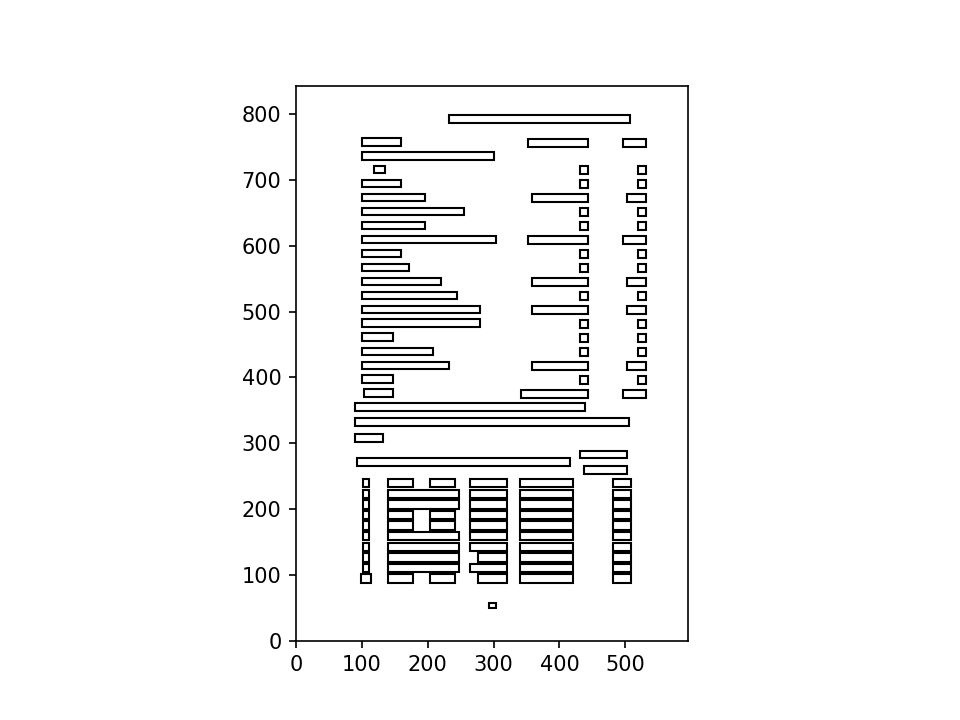

<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfminer.layout.LTTextLineHorizontal'> True
<class 'pdfm

In [22]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')  # 111: nrows, ncols, plot_number
ax1.set_xlim(layout.x0, layout.x1)
ax1.set_ylim(layout.y0, layout.y1)
  

i = 0
lsTxtBox = []
for lt_obj in layout:
    #print(type(lt_obj))
    #if isinstance(lt_obj, LTRect):
    if isinstance(lt_obj, LTTextBox):
        #if lt_obj.width < 5 or lt_obj.height < 5:
        #    continue
        i += 1
        #print("{}: {}".format(i, lt_obj.bbox))
        
        #for aa in lt_obj:
        #    #print(type(aa))
        #    for bb in aa:
        #        if not isinstance(bb, LTChar):
        #            print(type(bb))
                
        lsTxtBox.append(lt_obj)
        
        bFill = False
        #if '300104' in lt_obj.get_text():
        #if True:
            #bFill = True
        #print(type(lt_obj))
        #print(lt_obj.get_text())
        for xx in lt_obj:
            #print(xx.get_text())
            print(type(xx), isinstance(xx, LTTextLine))
            if isinstance(xx, LTTextLine):
                ax1.add_patch(
                    patches.Rectangle(
                        (xx.x0, xx.y0),   # (x,y)
                        xx.width,          # width
                        xx.height,          # height
                        fill=bFill      # no background
                    )
                )
        '''
        ax1.add_patch(
            patches.Rectangle(
                (lt_obj.x0, lt_obj.y0),   # (x,y)
                lt_obj.width,          # width
                lt_obj.height,          # height
                fill=bFill      # no background
            )
        )
        '''
        #if i > 300:
        #    break
        #print(lt_obj.get_text())
print("\nTotal specified objects: {}".format(i))
plt.show()
#fig1.savefig('rect.png', dpi=600)

<IPython.core.display.Javascript object>


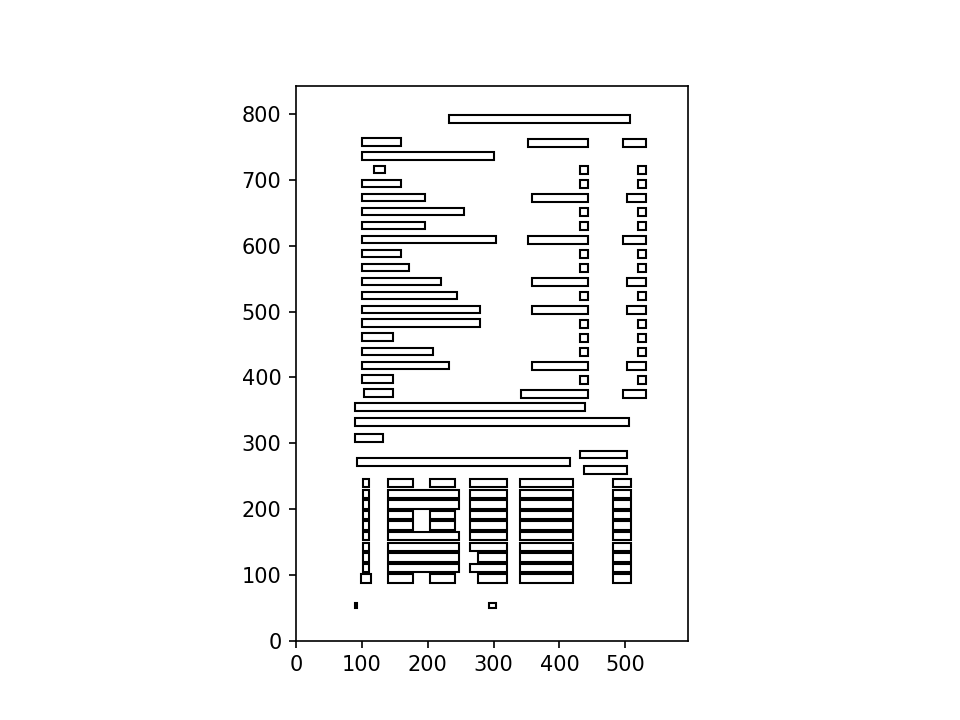

In [25]:
def extractTextLines(lt_obj):
    lsTxtLines = []
    if isinstance(lt_obj, LTTextLine):
        lsTxtLines.append(lt_obj)
    elif isinstance(lt_obj, LTTextBox):
        for child in lt_obj:
            lsTxtLines.extend(extractTextLines(child))
    return lsTxtLines
#end def

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')  # 111: nrows, ncols, plot_number
ax1.set_xlim(layout.x0, layout.x1)
ax1.set_ylim(layout.y0, layout.y1)

i = 0
lsTxtLines = []
for lt_obj in layout:
    lsTxtLines = extractTextLines(lt_obj)
    for txtLn in lsTxtLines:
        ax1.add_patch(
            patches.Rectangle(
                (txtLn.x0, txtLn.y0),   # (x,y)
                txtLn.width,          # width
                txtLn.height,          # height
                fill=False      # no background
            )
        )

#print("\nTotal specified objects: {}".format(i))
plt.show()

In [106]:
for a in lt_obj:
    print(type(a))
    for b in a:
        print(type(b))

<class 'pdfminer.layout.LTTextLineHorizontal'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTAnon'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTChar'>
<class 'pdfminer.layout.LTAnon'>


In [100]:
group_by_line(lsTxtBox)

We got 38 groups
长盛同智优势混合（LOF）2016 年年度报告
S 综合	-	-
合计	548,399,329.52	74.43
8.2.2 报告期末按行业分类的沪港通投资股票投资组合
注：本基金本报告期末未持有沪港通投资股票。
8.3 期末按公允价值占基金资产净值比例大小排序的所有股票投资明细
金额单位：人民币元
序号 股票代码 股票名称 数量（股）	公允价值 占基金资产净值比例（%）
1	600703 三安光电	3,765,780 50,423,794.20	6.84
2	000425 徐工机械	11,929,200 40,320,696.00	5.47
3	600031 三一重工	5,337,971 32,561,623.10	4.42
4	000998 隆平高科	1,492,061 31,974,867.23	4.34
5	600737 中粮屯河	1,844,300 22,979,978.00	3.12
6	600873 梅花生物	3,410,100 22,233,852.00	3.02
7	000930 中粮生化	1,367,000 18,372,480.00	2.49
8	002353 杰瑞股份	857,387 17,404,956.10	2.36
9	000860 顺鑫农业	705,000 15,510,000.00	2.10
10	600057 象屿股份	1,301,100 14,962,650.00	2.03
11	600108 亚盛集团	2,595,600 14,846,832.00	2.01
12	603718 海利生物	818,260 14,581,393.20	1.98
13	002470 金正大	1,728,508 13,655,213.20	1.85
14	600811 东方集团	1,841,200 13,164,580.00	1.79
15	000902 新洋丰	1,039,584 11,705,715.84	1.59
16	002304 洋河股份	163,026 11,509,635.60	1.56
17	601390 中国中铁	1,265,000 11,207,900.00	1.52
18	000049 德赛电池	248,260 10,439,333.00	1.42
19	600186 莲花健康	1,930,56

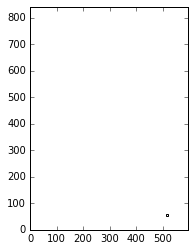

In [77]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')  # 111: nrows, ncols, plot_number
ax1.set_xlim(layout.x0, layout.x1)
ax1.set_ylim(layout.y0, layout.y1)
ax1.add_patch(
    patches.Rectangle(
        (lt_obj.x0, lt_obj.y0),   # (x,y)
        lt_obj.width,          # width
        lt_obj.height,          # height
        fill=False      # no background
    )
)
plt.show()

In [24]:
q = 1.154/1.083

In [17]:
a = 1.31794/1.083*(q**8-1)/(q-1)

In [20]:
b = 9.62*1.154**8 * 2 / 1.083**8

In [21]:
a + b + 9.62

53.88351313089014

In [22]:
9.62*1.154**8 * 3 / 1.083**8 + 0.63492/1.083*(q**8-1)/(q-1)

53.88351313089014